# Imports

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define functions

In [23]:
def get_percentage_df(df):
    df_perc = df[df['verified'] == True].groupby('millis').mean()
    df_perc['percentage_solved'] = 0.0
    size = df.shape[0]
    print("Dataframe contains " + str(size) + " elements")

    for index, row in df_perc.iterrows():
        df_solved = df[df['verified'] == True]
        num_solved = df_solved[df_solved['millis'] <= index].shape[0]
        percentage_solved = num_solved / df.shape[0]
        df_perc.at[index, 'percentage_solved'] = percentage_solved
    df_perc.at[180000, 'percentage_solved'] = df[df['verified'] == True].shape[0] / df.shape[0]

    return df_perc

def add_percentage_df(df_perc, df_add):
    df_perc['percentage_solved_y'] = 0.0
    for index, row in df_perc.iterrows():
        df_solved = df_add[df_add['verified'] == True]
        num_solved = df_solved[df_solved['millis'] <= index].shape[0]
        percentage_solved = num_solved / df_add.shape[0]
        df_perc.at[index, 'percentage_solved_y'] = percentage_solved
    df_perc.at[180000, 'percentage_solved_y'] = df_add[df_add['verified'] == True].shape[0] / df_add.shape[0]
    return df_perc

def split_synthetic_complex(df):
    df_synthetic = df[df['name'].str.match('synth')]
    df_complex = df[~df['name'].str.match('synth')]
    return df_synthetic, df_complex

def print_results(name, df):
    print("Results for '" + name + "':")
    df_synthetic, df_complex = split_synthetic_complex(df)
    num_synthetic = df_synthetic.shape[0]
    df_synthetic_solved = df_synthetic[df_synthetic['verified'] == True]
    num_synthetic_solved = df_synthetic_solved.shape[0]
    percentage_solved = num_synthetic_solved * 100 / num_synthetic if num_synthetic else 100
    print("Synthetic: " + str(num_synthetic_solved) + "/" + str(num_synthetic) + " (" + str(round(percentage_solved, 2)) + "%)")

    num_complex = df_complex.shape[0]
    df_complex_solved = df_complex[df_complex['verified'] == True]
    num_complex_solved = df_complex_solved.shape[0]
    percentage_solved = num_complex_solved * 100 / num_complex if num_complex else 100
    print("Complex: " + str(num_complex_solved) + "/" + str(num_complex) + " (" + str(round(percentage_solved, 2)) + "%)")

    num_overall = df.shape[0]
    df_solved = df[df['verified'] == True]
    num_solved = df_solved.shape[0]
    percentage_solved = num_solved * 100 / num_overall if num_overall else 100
    print("Overall: " + str(num_solved) + "/" + str(num_overall) + " (" + str(round(percentage_solved, 2)) + "%)")
    print()

# Load Data

In [54]:
# Create pandas dataframes from csv
df_V3 = pd.read_csv("../logs/MainLog-3.2_UpdatePacking.csv", sep=",", header=0)
df_V3['millis'] = df_V3['millis'] * 2
df0 = pd.read_csv("../logs/ILPLog-4.0_LazyCyclesFull.csv", sep=",", header=0)
df0['millis'] = df0['millis'] * 2
df1 = pd.read_csv("../logs/ILPLog-4.1_LazyCyclesPreprocessing.csv", sep=",", header=0)
df1['millis'] = df1['millis'] * 2
df2 = pd.read_csv("../logs/ILPLog-4.2_LazyCyclesNone.csv", sep=",", header=0)
df2['millis'] = df2['millis'] * 2
df3 = pd.read_csv("../logs/ILPLog-4.3_LazyCyclesFullWOtherPacking.csv", sep=",", header=0)
df3['millis'] = df3['millis'] * 2
df4 = pd.read_csv("../logs/ILPLog-4.4_LazyCyclesFull+Cycles.csv", sep=",", header=0)
df4['millis'] = df4['millis'] * 2
df5 = pd.read_csv("../logs/ILPLog-4.5_OrderingFull.csv", sep=",", header=0)
df5['millis'] = df5['millis'] * 2
df6 = pd.read_csv("../logs/ILPLog-4.6_OrderingPreprocessing.csv", sep=",", header=0)
df6['millis'] = df6['millis'] * 2
df7 = pd.read_csv("../logs/ILPLog-4.7_OrderingNone.csv", sep=",", header=0)
df7['millis'] = df7['millis'] * 2
df8 = pd.read_csv("../logs/ILPLog-4.8_OrderingFullWOtherPacking.csv", sep=",", header=0)
df8['millis'] = df8['millis'] * 2
df9 = pd.read_csv("../logs/ILPLog-4.9_OrderingFull+Cycles.csv", sep=",", header=0)
df9['millis'] = df9['millis'] * 2
df10 = pd.read_csv("../logs/ILPLog-4.10_Ordering+CyclesOtherPacking.csv", sep=",", header=0)
df10['millis'] = df10['millis'] * 2
df11 = pd.read_csv("../logs/ILPLog-4.11_LazyCyclesDoublePacking.csv", sep=",", header=0)
df11['millis'] = df11['millis'] * 2

# Style plot
plt.style.use('default')
font = {'size' : 32}
plt.rc('font', **font)
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

# Print results for Light BFS

In [55]:
print_results('Lazy Cycles Full', df0)
print_results('Lazy Cycles + Preprocessing', df1)
print_results('Lazy Cycles None', df2)
print_results('Lazy Cycles Full (Other Packing)', df3)
print_results('Lazy Cycles Full + Cycles', df4)
print_results('Ordering Full', df5)
print_results('Ordering + Preprocessing', df6)
print_results('Ordering None', df7)
print_results('Ordering Full (Other Packing)', df8)
print_results('Ordering Full + Cycles', df9)
print_results('Ordering Full (Other Packing) + Cycles', df10)
print_results('Double Packing', df11)


Results for 'Lazy Cycles Full':
Synthetic: 229/315 (72.7%)
Complex: 126/137 (91.97%)
Overall: 355/452 (78.54%)

Results for 'Lazy Cycles + Preprocessing':
Synthetic: 192/315 (60.95%)
Complex: 121/137 (88.32%)
Overall: 313/452 (69.25%)

Results for 'Lazy Cycles None':
Synthetic: 193/315 (61.27%)
Complex: 75/137 (54.74%)
Overall: 268/452 (59.29%)

Results for 'Lazy Cycles Full (Other Packing)':
Synthetic: 226/315 (71.75%)
Complex: 121/137 (88.32%)
Overall: 347/452 (76.77%)

Results for 'Lazy Cycles Full + Cycles':
Synthetic: 292/315 (92.7%)
Complex: 126/137 (91.97%)
Overall: 418/452 (92.48%)

Results for 'Ordering Full':
Synthetic: 223/315 (70.79%)
Complex: 124/137 (90.51%)
Overall: 347/452 (76.77%)

Results for 'Ordering + Preprocessing':
Synthetic: 172/315 (54.6%)
Complex: 121/137 (88.32%)
Overall: 293/452 (64.82%)

Results for 'Ordering None':
Synthetic: 176/315 (55.87%)
Complex: 120/137 (87.59%)
Overall: 296/452 (65.49%)

Results for 'Ordering Full (Other Packing)':
Synthetic: 231/31

# V3 vs ILP Line Plot

Dataframe contains 452 elements
Dataframe contains 452 elements


C:\Users\lenna\AppData\Local\Temp/ipykernel_17396/1484409756.py:32: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


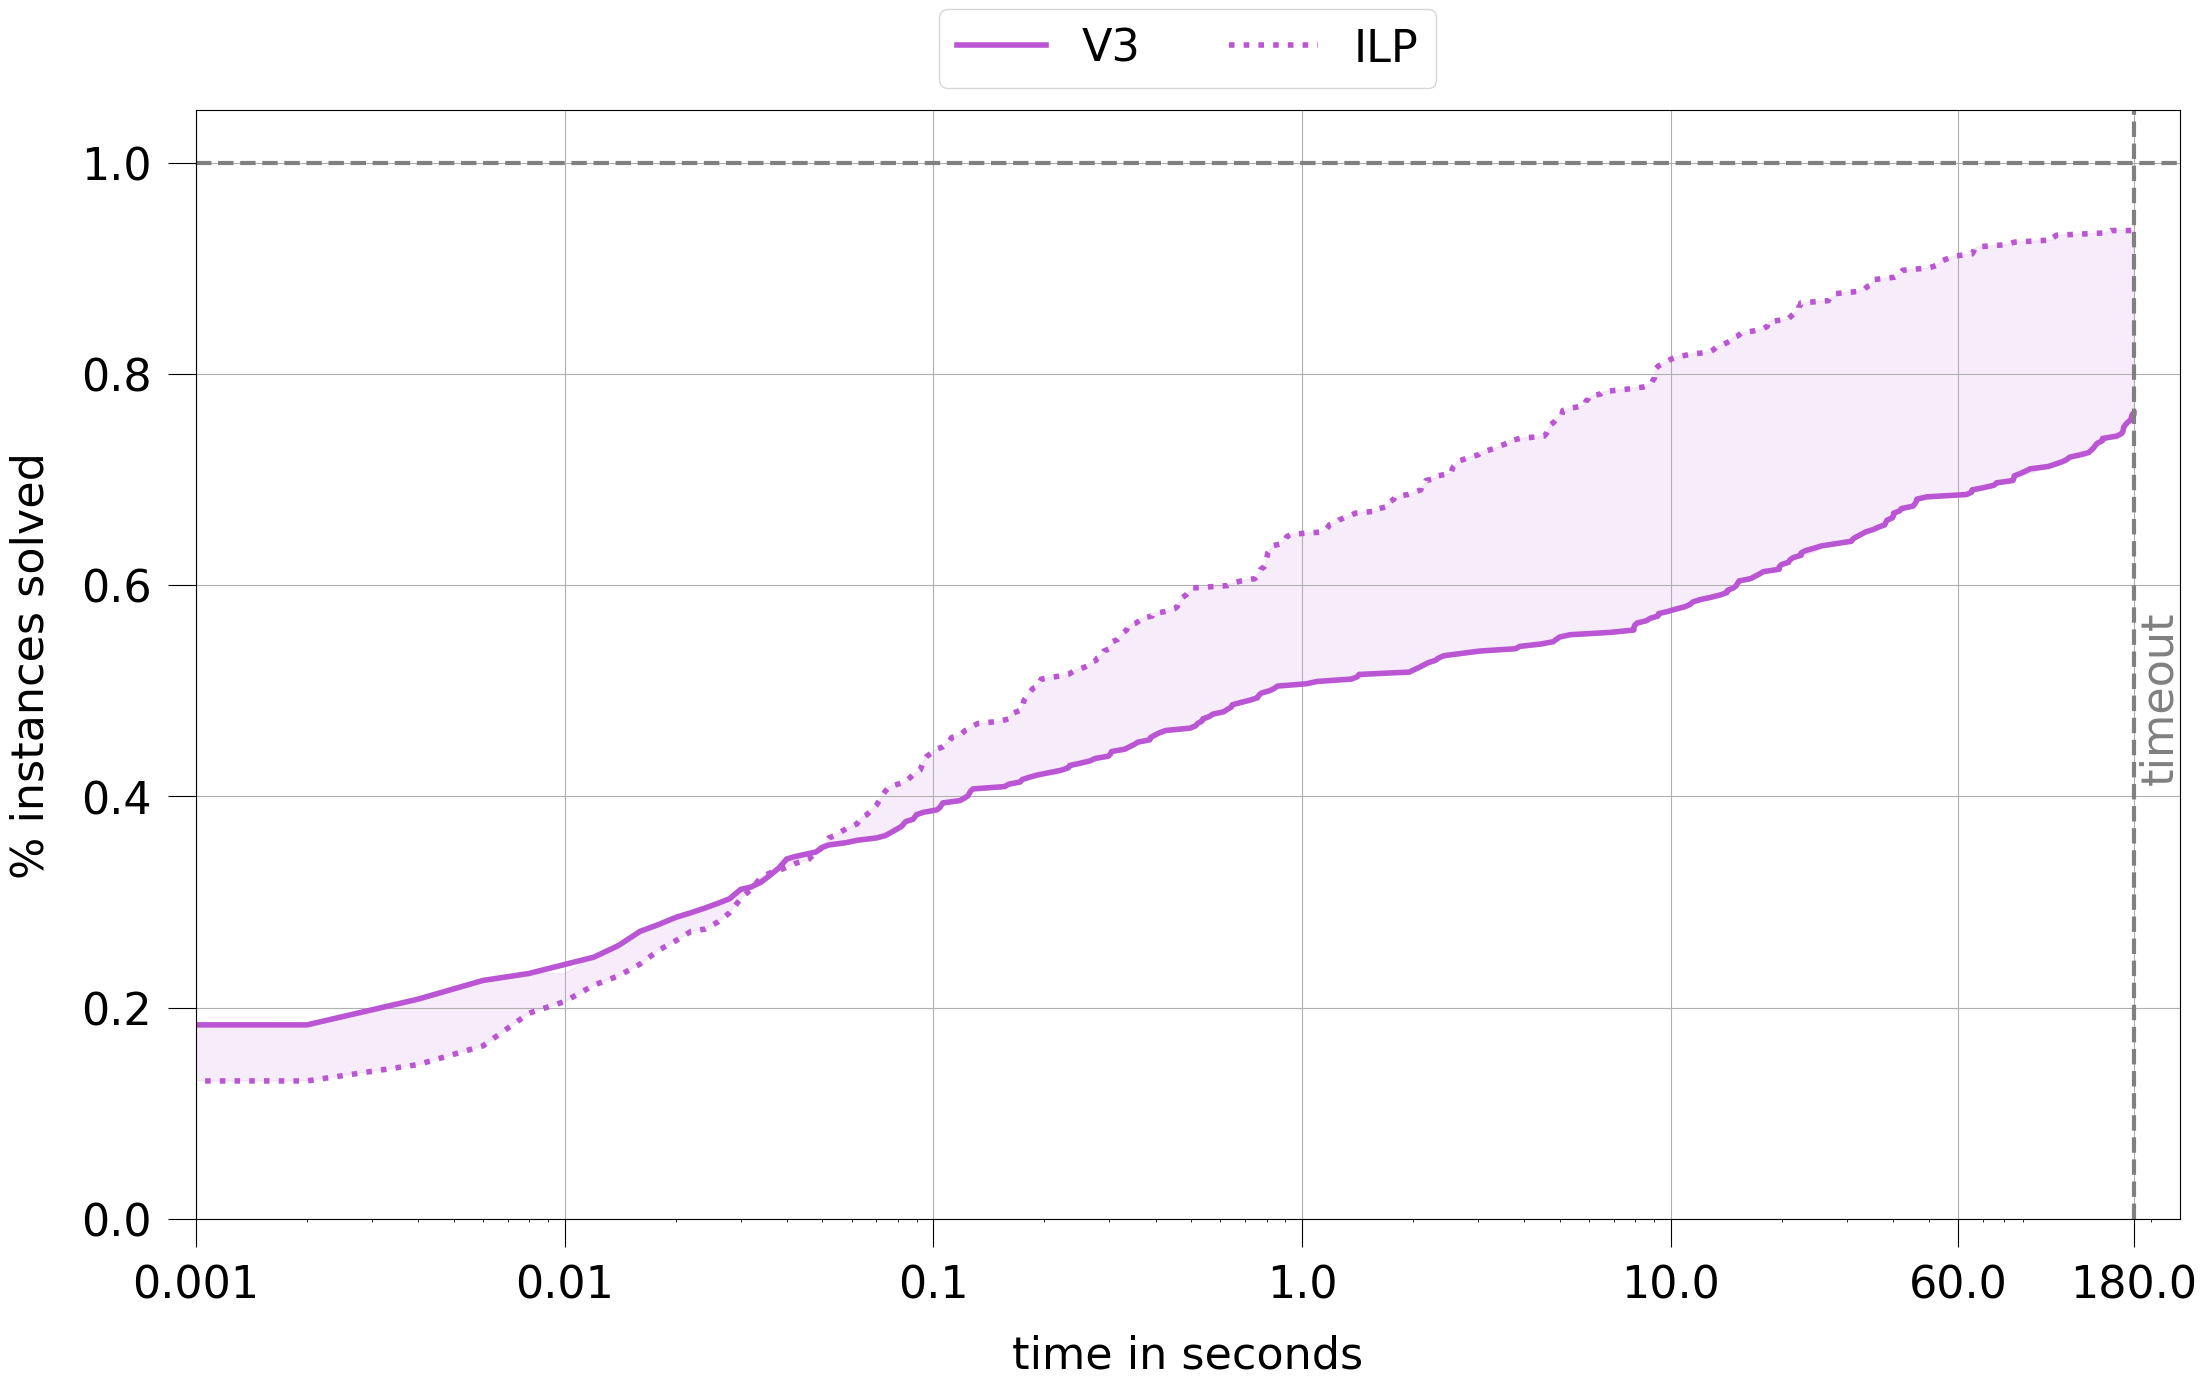

In [60]:
# Calculate percentage dataframes
df1_perc = get_percentage_df(df11)
df0_perc = get_percentage_df(df_V3)

# Add percentage values (for the area between curves)
df1_perc = add_percentage_df(df1_perc, df_V3)

# Plot lines
fig, ax = plt.subplots(figsize=(25.6, 14.4))
ax.plot(df0_perc['percentage_solved'], c='mediumorchid', linewidth='4', label='V3')
ax.plot(df1_perc['percentage_solved'], c='mediumorchid', linestyle=':', linewidth='4', label='ILP')
# Fill area between cruves
ax.fill_between(df1_perc.index, df1_perc['percentage_solved'], df1_perc['percentage_solved_y'], color='mediumorchid', alpha=0.1)

ax.set_xlabel('time in seconds', labelpad=20)
ax.set_ylabel('% instances solved', labelpad=20)
ax.set_xlim([1, 240000])
ax.set_ylim([0, 1.05])
ax.set_xscale('log')
ax.set_xticks([1, 10, 100, 1000, 10000, 60000, 180000])
ax.set_xticklabels([0.001, 0.01, 0.1, 1.0, 10.0, 60.0, 180.0])
ax.tick_params(axis='both', length=20, which='major', pad=12)
ax.grid()
ax.legend(bbox_to_anchor=(0, 1, 1, 0), loc='lower center', ncol=2)

# Draw
ax.axvline(x=180000, color='gray', linestyle='--', linewidth=3)
ax.axhline(y=1, color='gray', linestyle='--', linewidth=3)
ax.text(185000, 0.42, "timeout", color='gray', rotation='vertical')

fig.savefig('plots/v4/V3VsILPLinePlot.png',  bbox_inches='tight')
fig.show()

# Lazy Cycles: Preprocessing Line Plot

Dataframe contains 315 elements
Dataframe contains 137 elements
Dataframe contains 315 elements
Dataframe contains 137 elements


C:\Users\lenna\AppData\Local\Temp/ipykernel_17396/2330025068.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


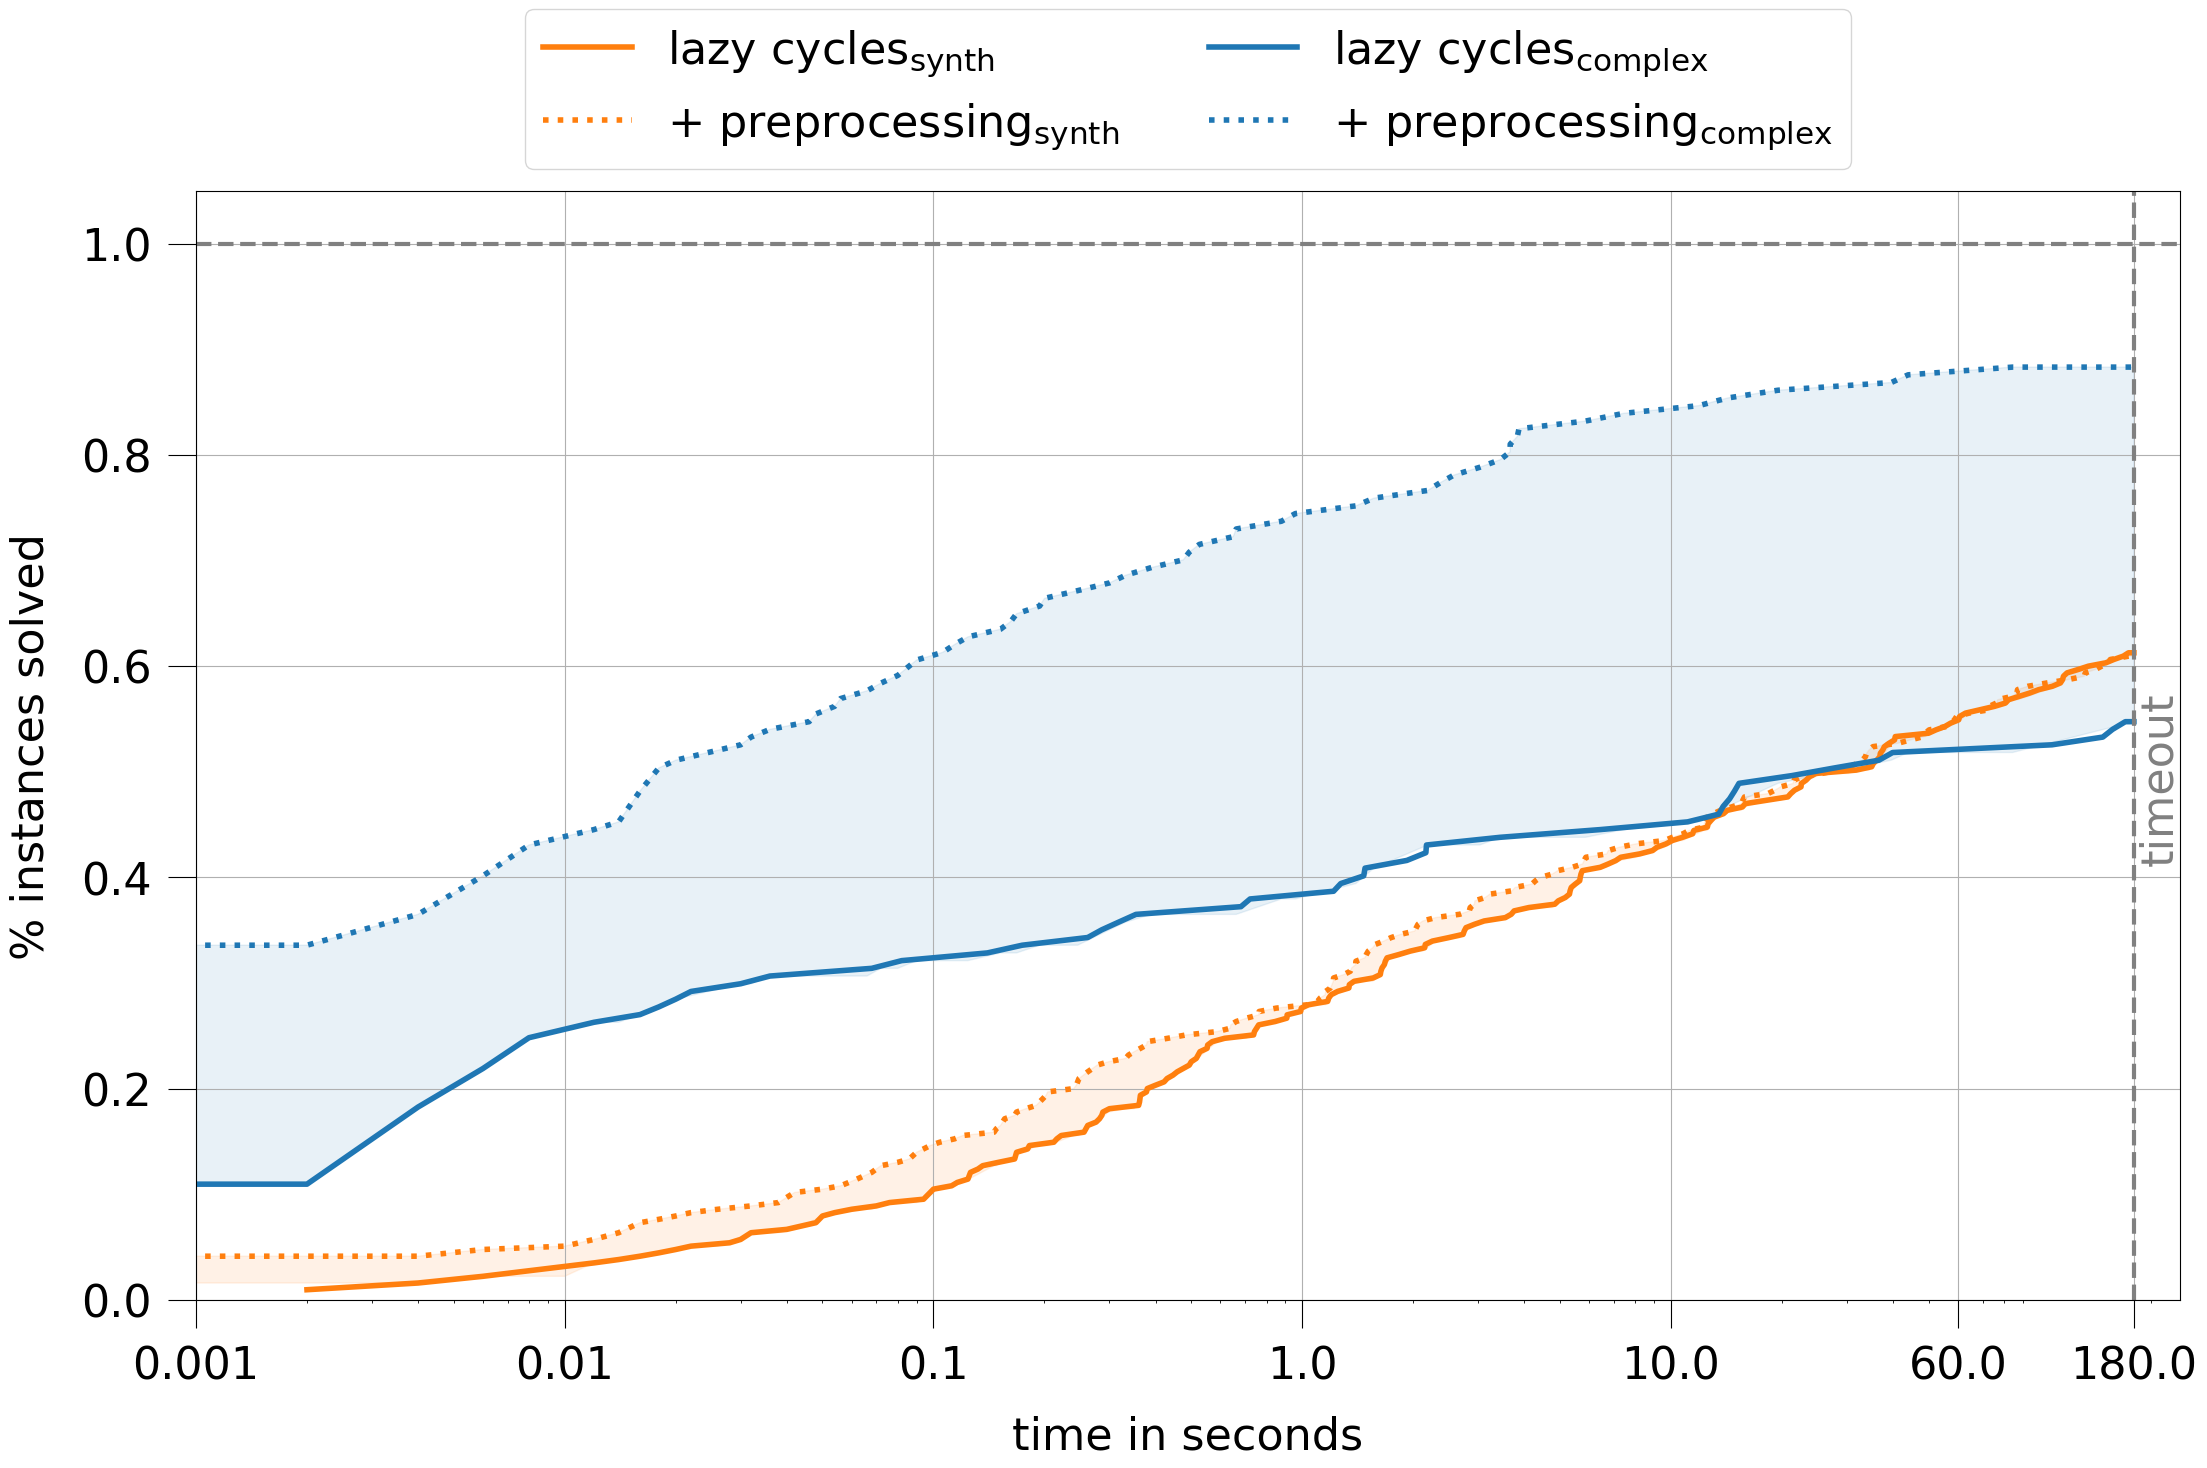

In [26]:
df_A_synthetic, df_A_complex = split_synthetic_complex(df1)
df_B_synthetic, df_B_complex = split_synthetic_complex(df2)

# Calculate percentage dataframes
df_A_synthetic_perc = get_percentage_df(df_A_synthetic)
df_A_complex_perc = get_percentage_df(df_A_complex)
df_B_synthetic_perc = get_percentage_df(df_B_synthetic)
df_B_complex_perc = get_percentage_df(df_B_complex)

# Add percentage values (for the area between curves)
df_A_synthetic_perc = add_percentage_df(df_A_synthetic_perc, df_B_synthetic)
df_A_complex_perc = add_percentage_df(df_A_complex_perc, df_B_complex)

# Plot lines
fig, ax = plt.subplots(figsize=(25.6, 14.4))
ax.plot(df_B_synthetic_perc['percentage_solved'], c='tab:orange', linewidth='4', label='lazy $cycles_{synth}$')
ax.plot(df_A_synthetic_perc['percentage_solved'], c='tab:orange', linestyle=':', linewidth='4', label='+ $preprocessing_{synth}$')
ax.plot(df_B_complex_perc['percentage_solved'], c='tab:blue', linewidth='4', label='lazy $cycles_{complex}$')
ax.plot(df_A_complex_perc['percentage_solved'], c='tab:blue', linestyle=':', linewidth='4', label='+ $preprocessing_{complex}$')
# Fill area between curves
ax.fill_between(df_A_synthetic_perc.index, df_A_synthetic_perc['percentage_solved'], df_A_synthetic_perc['percentage_solved_y'], color='tab:orange', alpha=0.1)
ax.fill_between(df_A_complex_perc.index, df_A_complex_perc['percentage_solved'], df_A_complex_perc['percentage_solved_y'], color='tab:blue', alpha=0.1)

ax.set_xlabel('time in seconds', labelpad=20)
ax.set_ylabel('% instances solved', labelpad=20)
ax.set_xlim([1, 240000])
ax.set_ylim([0, 1.05])
ax.set_xscale('log')
ax.set_xticks([1, 10, 100, 1000, 10000, 60000, 180000])
ax.set_xticklabels([0.001, 0.01, 0.1, 1.0, 10.0, 60.0, 180.0])
ax.tick_params(axis='both', length=20, which='major', pad=12)
ax.grid()
ax.legend(bbox_to_anchor=(0, 1, 1, 0), loc='lower center', ncol=2)

# Draw
ax.axvline(x=180000, color='gray', linestyle='--', linewidth=3)
ax.axhline(y=1, color='gray', linestyle='--', linewidth=3)
ax.text(185000, 0.42, "timeout", color='gray', rotation='vertical')

fig.savefig('plots/v4/LazyCyclesPreprocessingLinePlot.png',  bbox_inches='tight')
fig.show()

# Lazy Cycles: Cycle Packing Line Plot

Dataframe contains 315 elements
Dataframe contains 137 elements
Dataframe contains 315 elements
Dataframe contains 137 elements


C:\Users\lenna\AppData\Local\Temp/ipykernel_17396/1915744454.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


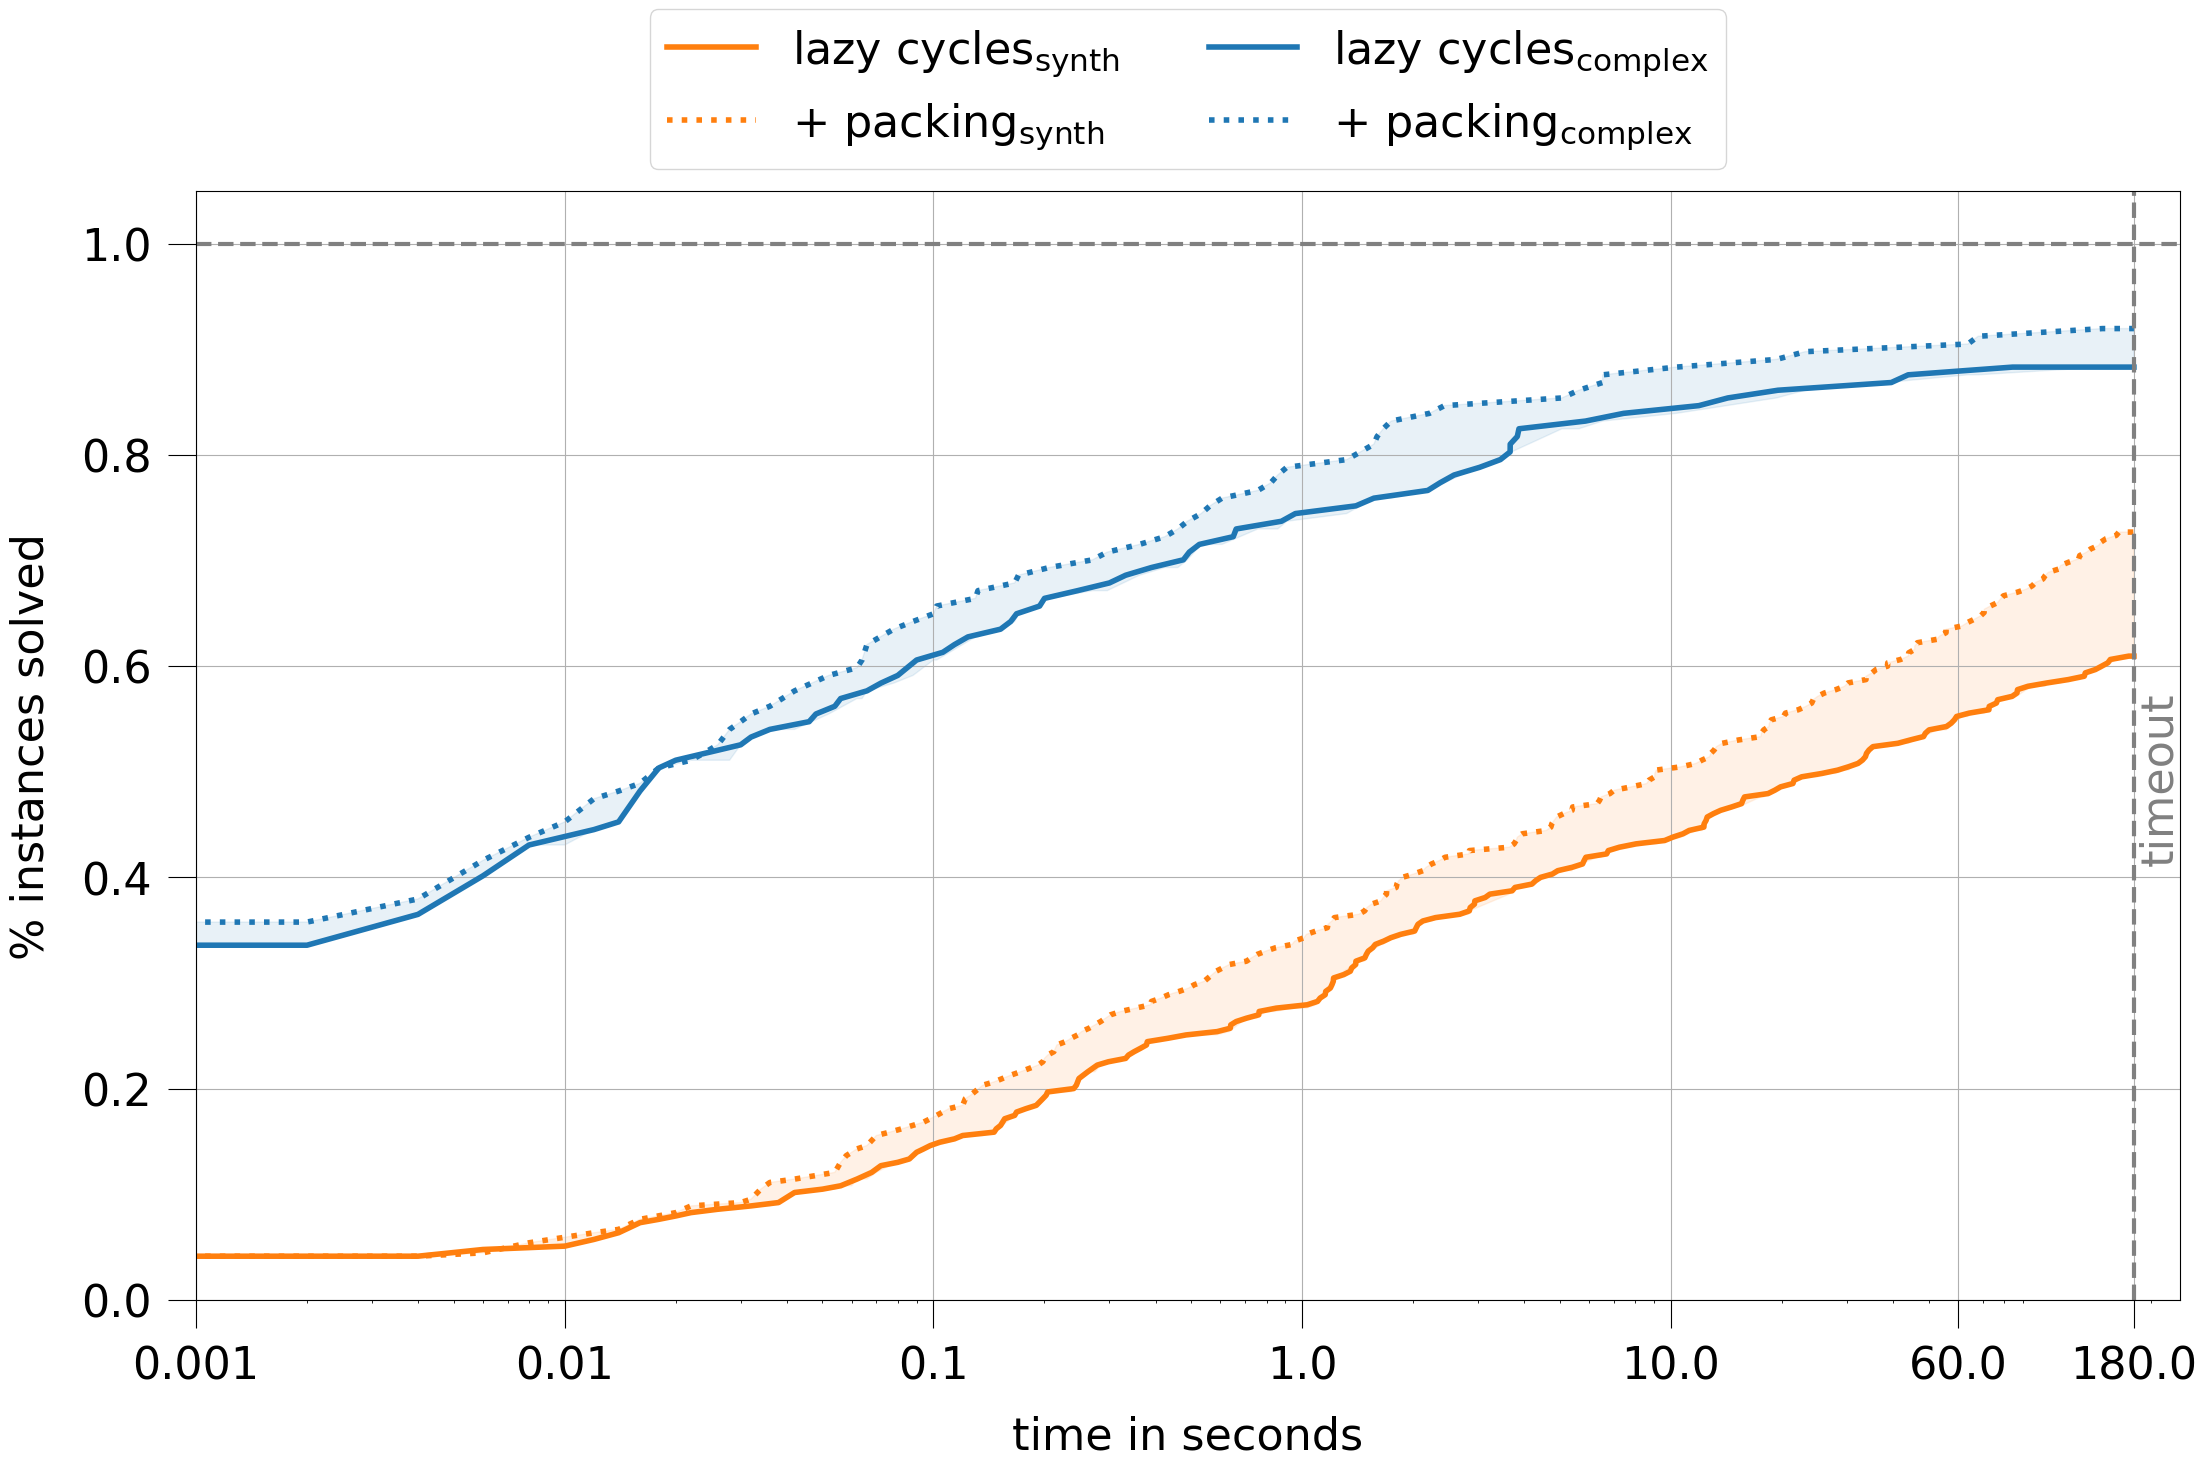

In [27]:
df_A_synthetic, df_A_complex = split_synthetic_complex(df0)
df_B_synthetic, df_B_complex = split_synthetic_complex(df1)

# Calculate percentage dataframes
df_A_synthetic_perc = get_percentage_df(df_A_synthetic)
df_A_complex_perc = get_percentage_df(df_A_complex)
df_B_synthetic_perc = get_percentage_df(df_B_synthetic)
df_B_complex_perc = get_percentage_df(df_B_complex)

# Add percentage values (for the area between curves)
df_A_synthetic_perc = add_percentage_df(df_A_synthetic_perc, df_B_synthetic)
df_A_complex_perc = add_percentage_df(df_A_complex_perc, df_B_complex)

# Plot lines
fig, ax = plt.subplots(figsize=(25.6, 14.4))
ax.plot(df_B_synthetic_perc['percentage_solved'], c='tab:orange', linewidth='4', label='lazy $cycles_{synth}$')
ax.plot(df_A_synthetic_perc['percentage_solved'], c='tab:orange', linestyle=':', linewidth='4', label='+ $packing_{synth}$')
ax.plot(df_B_complex_perc['percentage_solved'], c='tab:blue', linewidth='4', label='lazy $cycles_{complex}$')
ax.plot(df_A_complex_perc['percentage_solved'], c='tab:blue', linestyle=':', linewidth='4', label='+ $packing_{complex}$')
# Fill area between curves
ax.fill_between(df_A_synthetic_perc.index, df_A_synthetic_perc['percentage_solved'], df_A_synthetic_perc['percentage_solved_y'], color='tab:orange', alpha=0.1)
ax.fill_between(df_A_complex_perc.index, df_A_complex_perc['percentage_solved'], df_A_complex_perc['percentage_solved_y'], color='tab:blue', alpha=0.1)

ax.set_xlabel('time in seconds', labelpad=20)
ax.set_ylabel('% instances solved', labelpad=20)
ax.set_xlim([1, 240000])
ax.set_ylim([0, 1.05])
ax.set_xscale('log')
ax.set_xticks([1, 10, 100, 1000, 10000, 60000, 180000])
ax.set_xticklabels([0.001, 0.01, 0.1, 1.0, 10.0, 60.0, 180.0])
ax.tick_params(axis='both', length=20, which='major', pad=12)
ax.grid()
ax.legend(bbox_to_anchor=(0, 1, 1, 0), loc='lower center', ncol=2)

# Draw
ax.axvline(x=180000, color='gray', linestyle='--', linewidth=3)
ax.axhline(y=1, color='gray', linestyle='--', linewidth=3)
ax.text(185000, 0.42, "timeout", color='gray', rotation='vertical')

fig.savefig('plots/v4/LazyCyclesPackingLinePlot.png',  bbox_inches='tight')
fig.show()

# Lazy Cycles: Cycle Packing Scatter Plot

C:\Users\lenna\AppData\Local\Temp/ipykernel_17396/1711120429.py:34: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


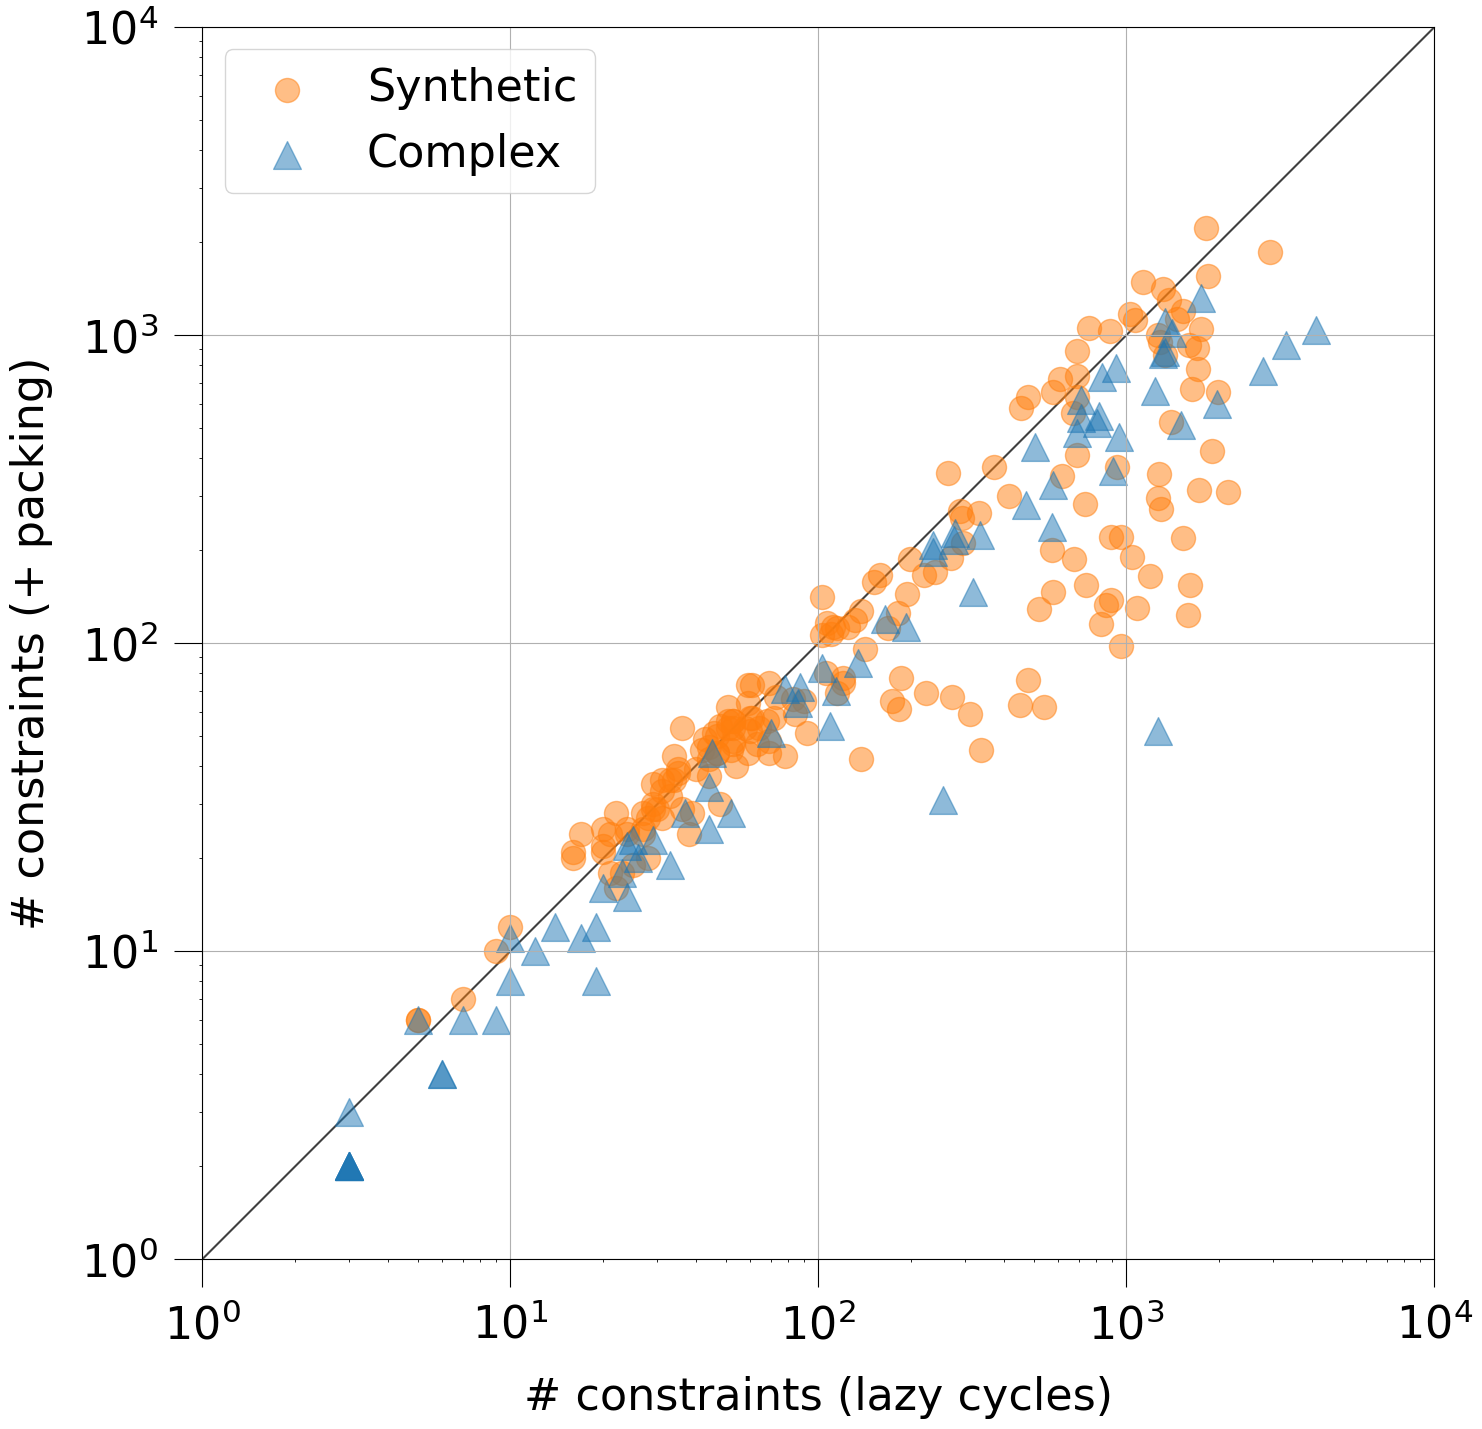

In [50]:
df_merge = df1.merge(df0, on='name', how='inner')
df_merge = df_merge[df_merge['verified_x'] == True]
df_merge = df_merge[df_merge['verified_y'] == True]
df_merge_synthetic, df_merge_complex = split_synthetic_complex(df_merge)

fig, ax = plt.subplots(figsize=(16, 16))
ax.scatter(df_merge_synthetic['num_constraints_x'], df_merge_synthetic['num_constraints_y'], c='tab:orange', marker='o', alpha=0.5, s=300, label='Synthetic')
ax.scatter(df_merge_complex['num_constraints_x'], df_merge_complex['num_constraints_y'], c='tab:blue', marker='^', alpha=0.5, s=400, label='Complex')

ax.set_xlabel('optimal k')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([1, 10000])
ax.set_ylim([1, 10000])
ax.set_xlabel('# constraints (lazy cycles)', labelpad=20)
ax.set_ylabel('# constraints (+ packing)', labelpad=20)
ax.tick_params(axis='both', length=20, which='major', pad=12)
ax.legend()
ax.grid()

# diagonal line
x = np.array([1,70000000])
y = np.array([1,70000000])
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

fig.savefig('plots/v4/LazyCyclesPackingScatterPlot.png',  bbox_inches='tight')
fig.show()

# Lazy Cycles: Cycles Constraint Line Plot

Dataframe contains 315 elements
Dataframe contains 137 elements
Dataframe contains 315 elements
Dataframe contains 137 elements


C:\Users\lenna\AppData\Local\Temp/ipykernel_17396/985653599.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


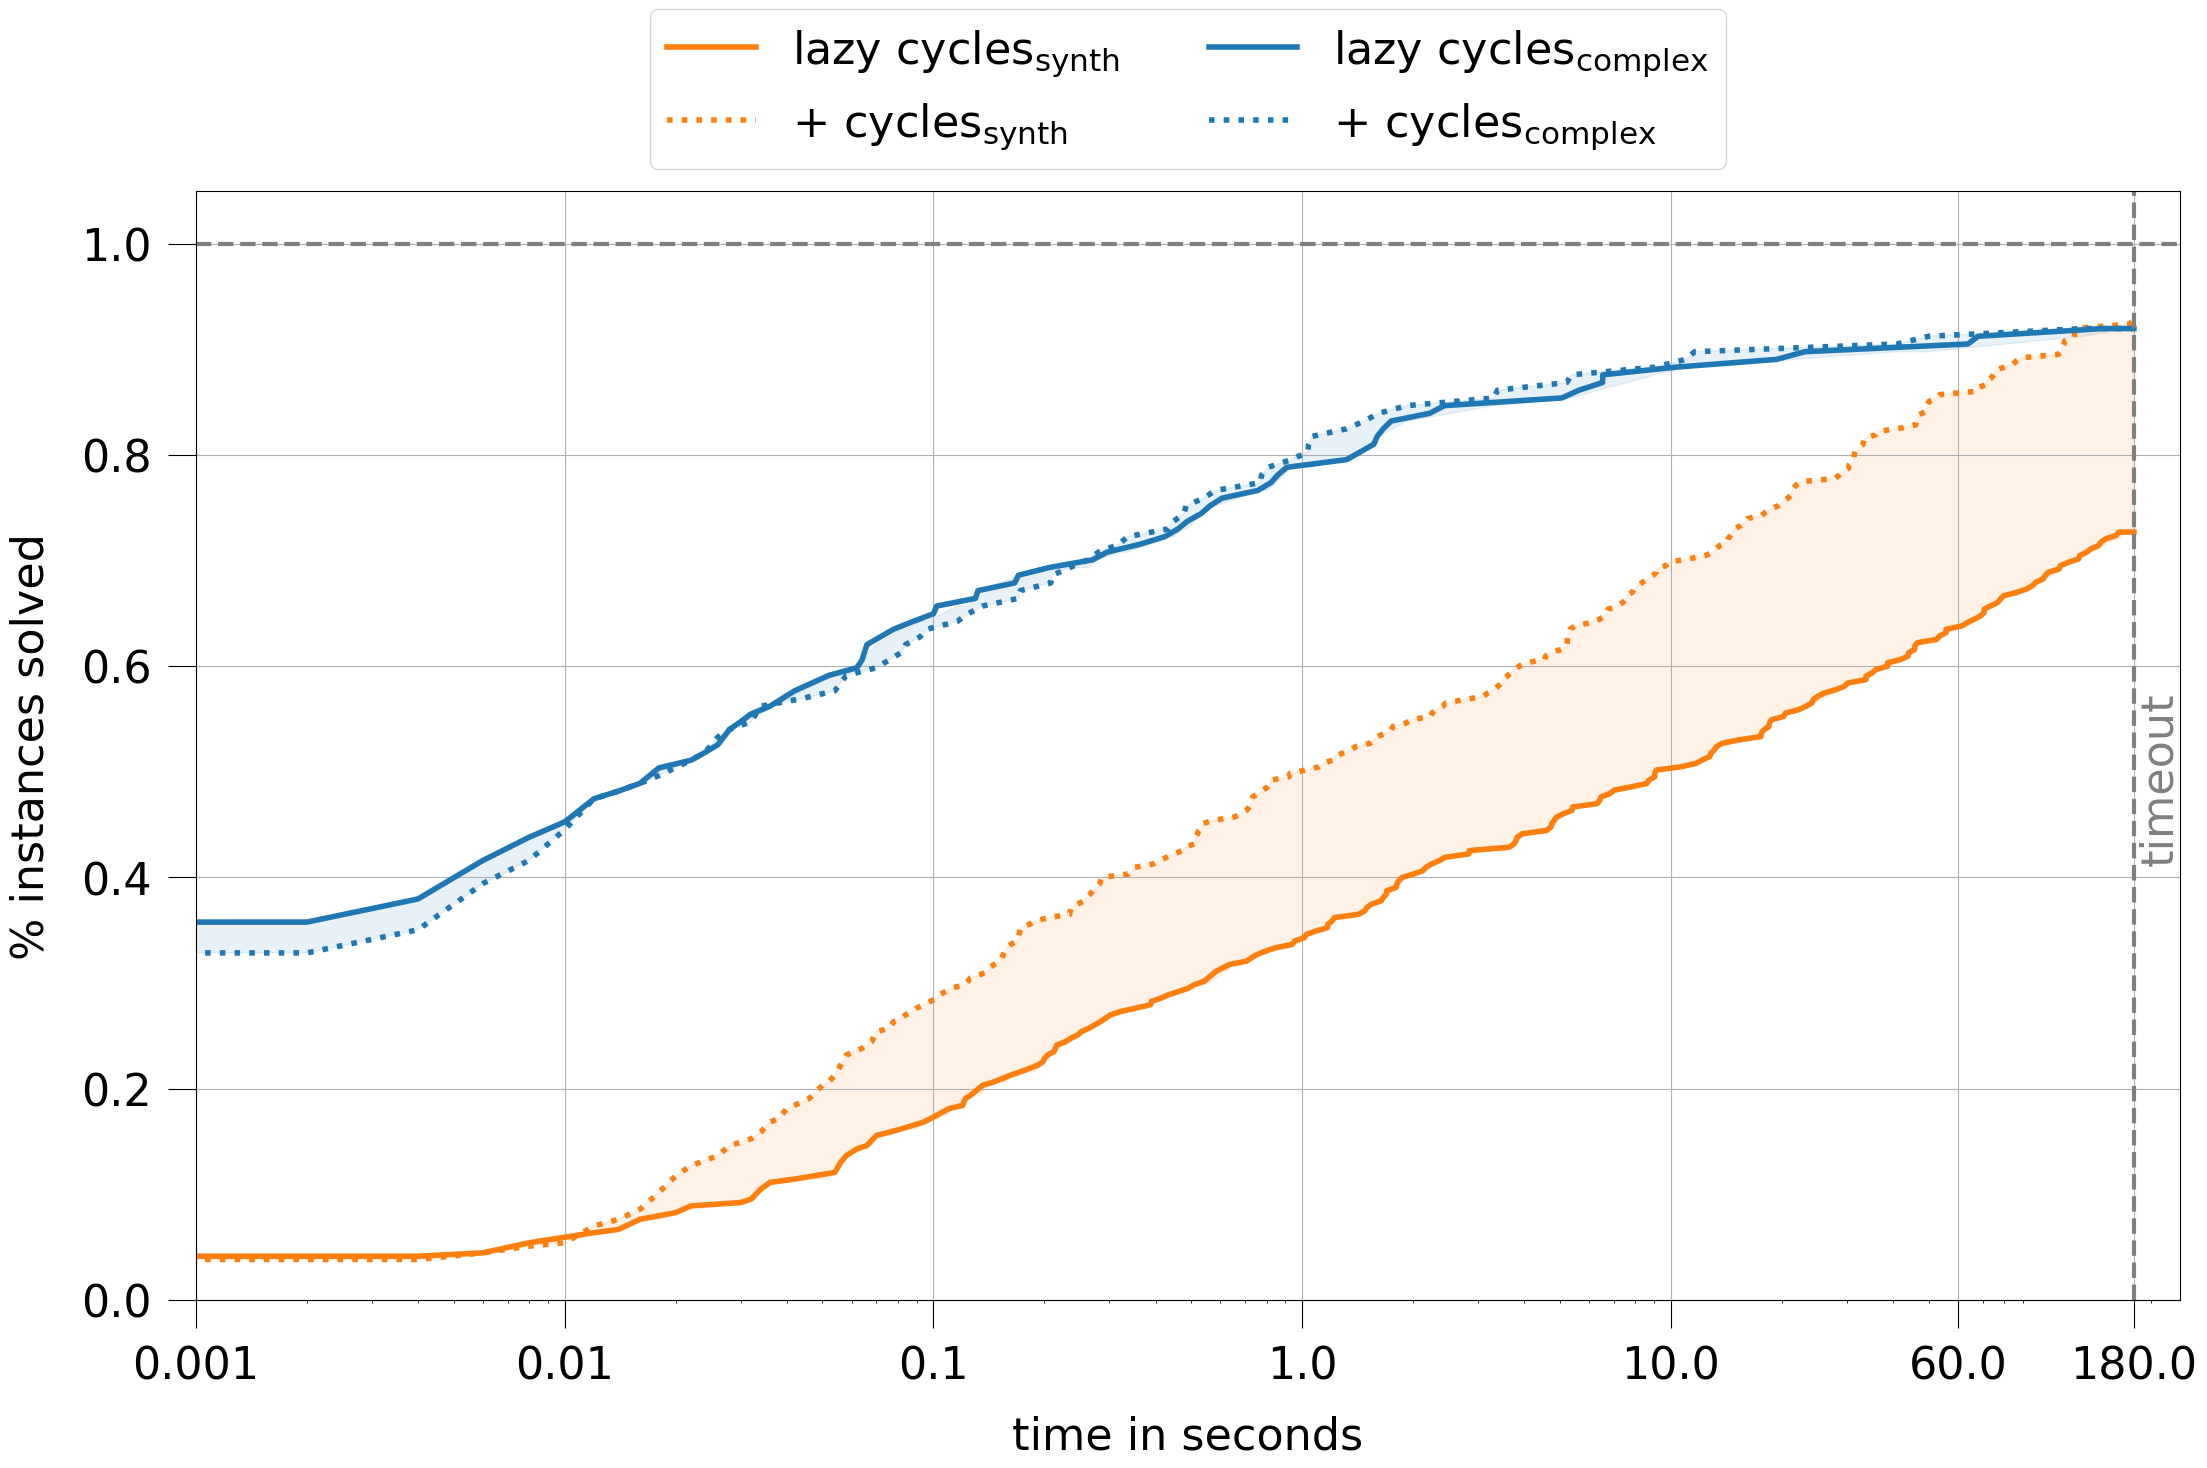

In [28]:
df_A_synthetic, df_A_complex = split_synthetic_complex(df4)
df_B_synthetic, df_B_complex = split_synthetic_complex(df0)

# Calculate percentage dataframes
df_A_synthetic_perc = get_percentage_df(df_A_synthetic)
df_A_complex_perc = get_percentage_df(df_A_complex)
df_B_synthetic_perc = get_percentage_df(df_B_synthetic)
df_B_complex_perc = get_percentage_df(df_B_complex)

# Add percentage values (for the area between curves)
df_A_synthetic_perc = add_percentage_df(df_A_synthetic_perc, df_B_synthetic)
df_A_complex_perc = add_percentage_df(df_A_complex_perc, df_B_complex)

# Plot lines
fig, ax = plt.subplots(figsize=(25.6, 14.4))
ax.plot(df_B_synthetic_perc['percentage_solved'], c='tab:orange', linewidth='4', label='lazy $cycles_{synth}$')
ax.plot(df_A_synthetic_perc['percentage_solved'], c='tab:orange', linestyle=':', linewidth='4', label='+ $cycles_{synth}$')
ax.plot(df_B_complex_perc['percentage_solved'], c='tab:blue', linewidth='4', label='lazy $cycles_{complex}$')
ax.plot(df_A_complex_perc['percentage_solved'], c='tab:blue', linestyle=':', linewidth='4', label='+ $cycles_{complex}$')
# Fill area between curves
ax.fill_between(df_A_synthetic_perc.index, df_A_synthetic_perc['percentage_solved'], df_A_synthetic_perc['percentage_solved_y'], color='tab:orange', alpha=0.1)
ax.fill_between(df_A_complex_perc.index, df_A_complex_perc['percentage_solved'], df_A_complex_perc['percentage_solved_y'], color='tab:blue', alpha=0.1)

ax.set_xlabel('time in seconds', labelpad=20)
ax.set_ylabel('% instances solved', labelpad=20)
ax.set_xlim([1, 240000])
ax.set_ylim([0, 1.05])
ax.set_xscale('log')
ax.set_xticks([1, 10, 100, 1000, 10000, 60000, 180000])
ax.set_xticklabels([0.001, 0.01, 0.1, 1.0, 10.0, 60.0, 180.0])
ax.tick_params(axis='both', length=20, which='major', pad=12)
ax.grid()
ax.legend(bbox_to_anchor=(0, 1, 1, 0), loc='lower center', ncol=2)

# Draw
ax.axvline(x=180000, color='gray', linestyle='--', linewidth=3)
ax.axhline(y=1, color='gray', linestyle='--', linewidth=3)
ax.text(185000, 0.42, "timeout", color='gray', rotation='vertical')

fig.savefig('plots/v4/LazyCyclesCyclesLinePlot.png',  bbox_inches='tight')
fig.show()

# Lazy Cycles: Double Packing

Dataframe contains 315 elements
Dataframe contains 137 elements
Dataframe contains 315 elements
Dataframe contains 137 elements


C:\Users\lenna\AppData\Local\Temp/ipykernel_17396/1658274877.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


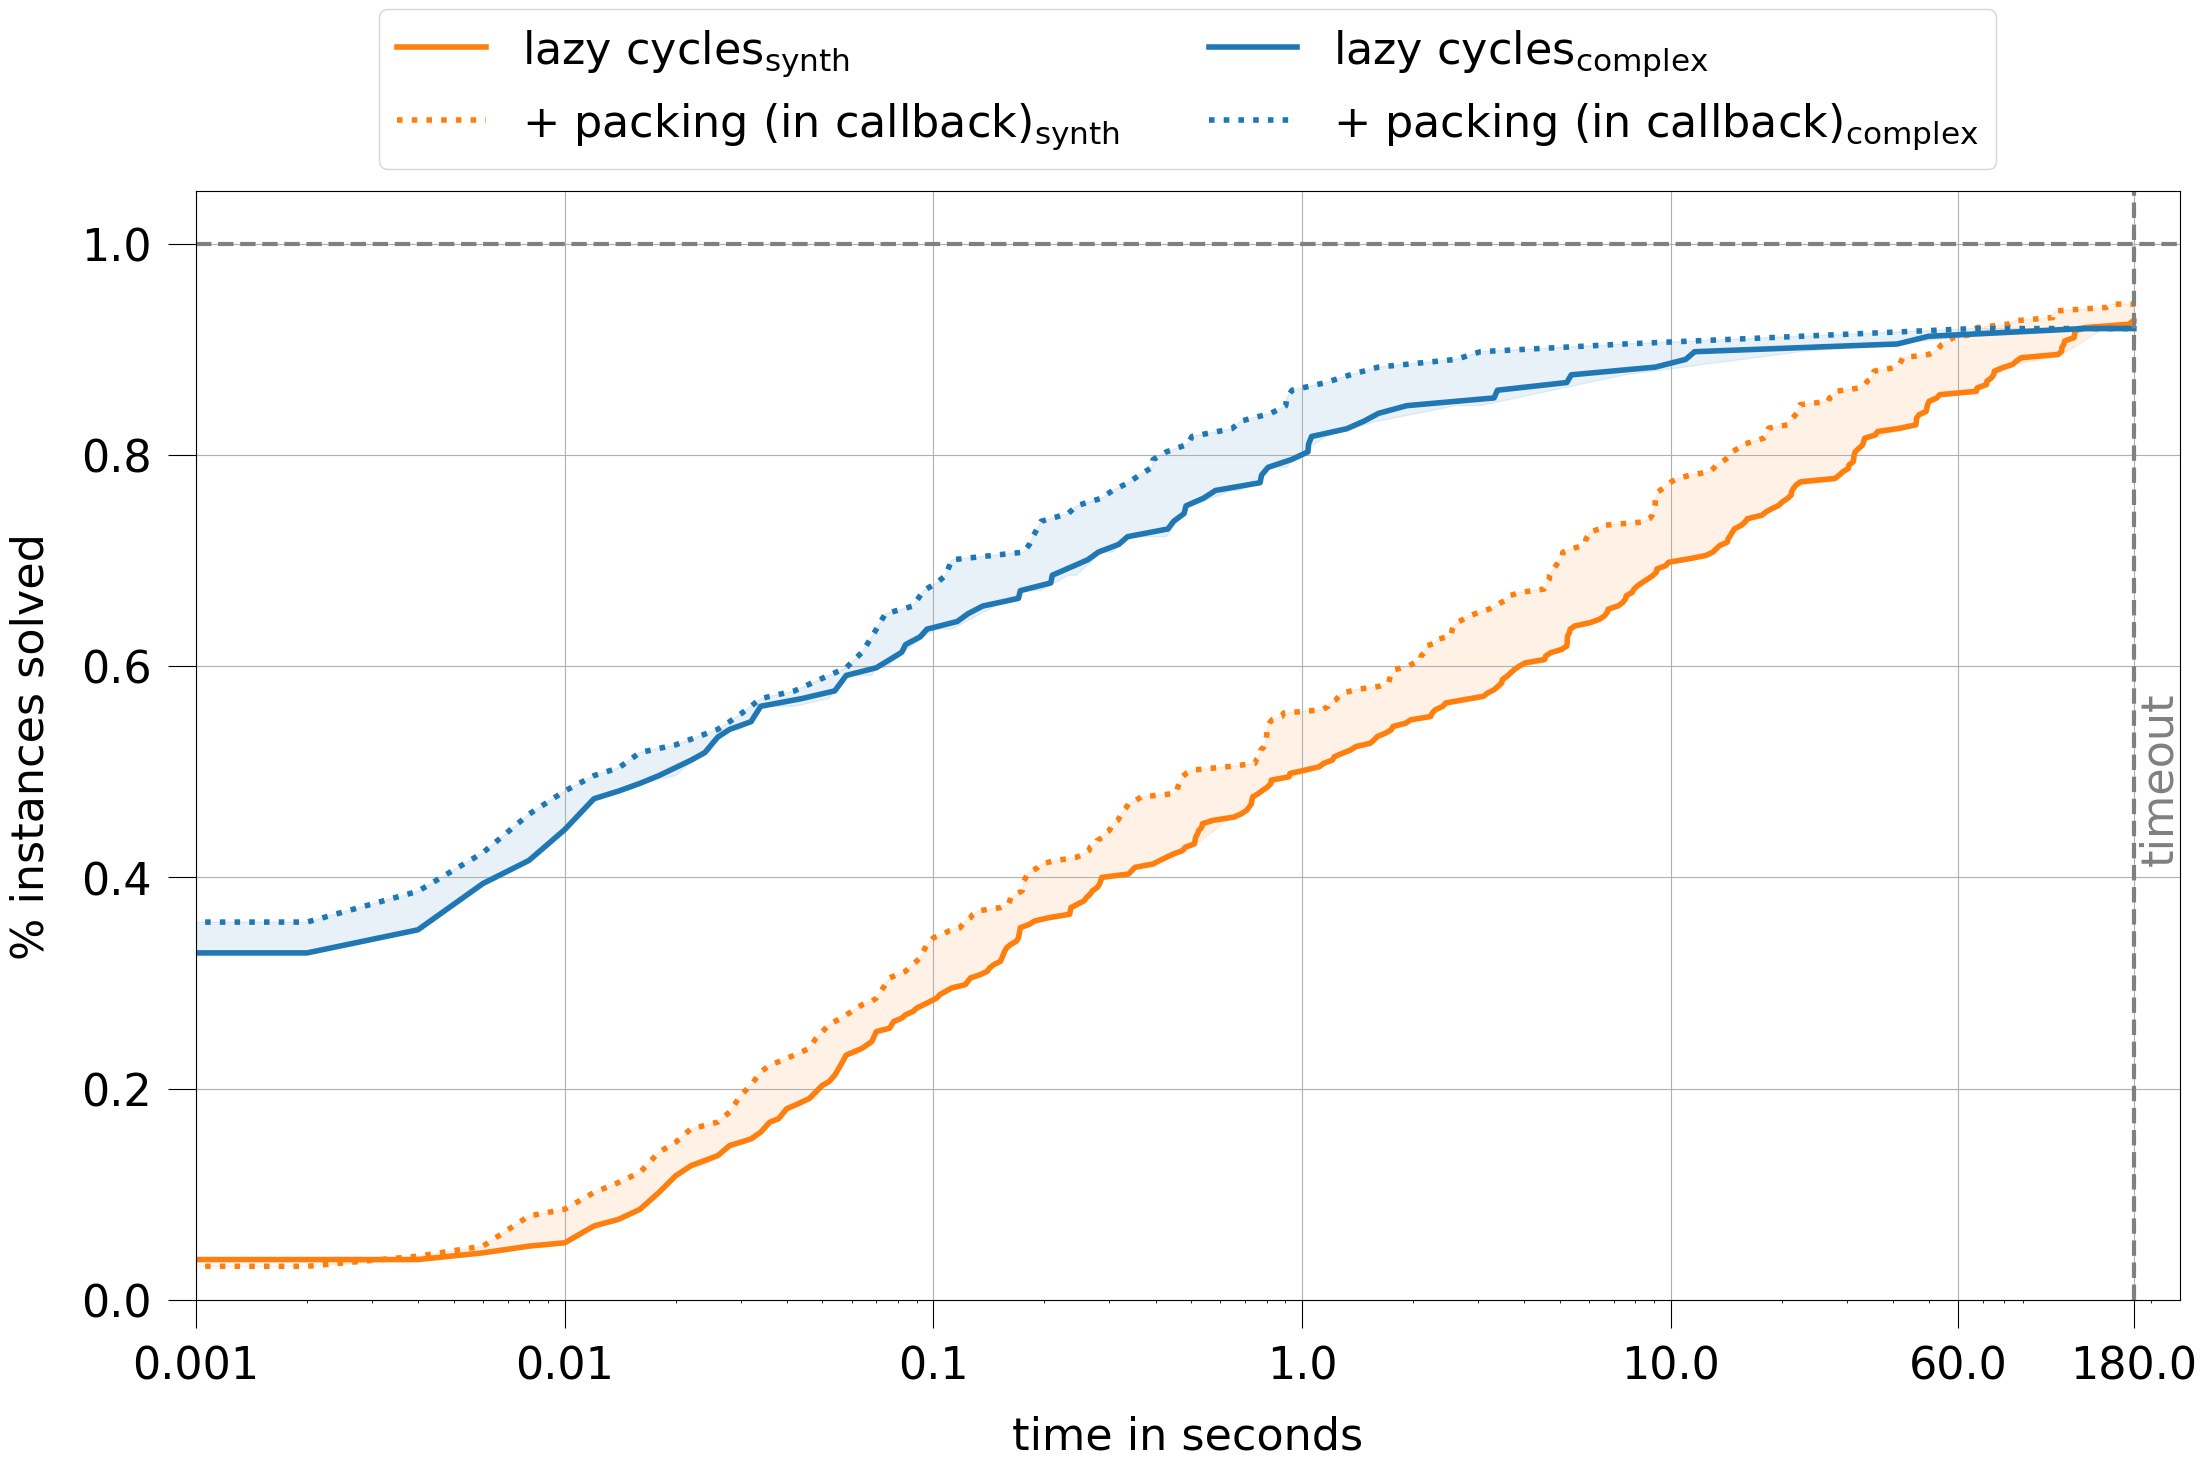

In [59]:
df_A_synthetic, df_A_complex = split_synthetic_complex(df11)
df_B_synthetic, df_B_complex = split_synthetic_complex(df4)

# Calculate percentage dataframes
df_A_synthetic_perc = get_percentage_df(df_A_synthetic)
df_A_complex_perc = get_percentage_df(df_A_complex)
df_B_synthetic_perc = get_percentage_df(df_B_synthetic)
df_B_complex_perc = get_percentage_df(df_B_complex)

# Add percentage values (for the area between curves)
df_A_synthetic_perc = add_percentage_df(df_A_synthetic_perc, df_B_synthetic)
df_A_complex_perc = add_percentage_df(df_A_complex_perc, df_B_complex)

# Plot lines
fig, ax = plt.subplots(figsize=(25.6, 14.4))
ax.plot(df_B_synthetic_perc['percentage_solved'], c='tab:orange', linewidth='4', label='lazy $cycles_{synth}$')
ax.plot(df_A_synthetic_perc['percentage_solved'], c='tab:orange', linestyle=':', linewidth='4', label='+ packing (in $callback)_{synth}$')
ax.plot(df_B_complex_perc['percentage_solved'], c='tab:blue', linewidth='4', label='lazy $cycles_{complex}$')
ax.plot(df_A_complex_perc['percentage_solved'], c='tab:blue', linestyle=':', linewidth='4', label='+ packing (in $callback)_{complex}$')
# Fill area between curves
ax.fill_between(df_A_synthetic_perc.index, df_A_synthetic_perc['percentage_solved'], df_A_synthetic_perc['percentage_solved_y'], color='tab:orange', alpha=0.1)
ax.fill_between(df_A_complex_perc.index, df_A_complex_perc['percentage_solved'], df_A_complex_perc['percentage_solved_y'], color='tab:blue', alpha=0.1)

ax.set_xlabel('time in seconds', labelpad=20)
ax.set_ylabel('% instances solved', labelpad=20)
ax.set_xlim([1, 240000])
ax.set_ylim([0, 1.05])
ax.set_xscale('log')
ax.set_xticks([1, 10, 100, 1000, 10000, 60000, 180000])
ax.set_xticklabels([0.001, 0.01, 0.1, 1.0, 10.0, 60.0, 180.0])
ax.tick_params(axis='both', length=20, which='major', pad=12)
ax.grid()
ax.legend(bbox_to_anchor=(0, 1, 1, 0), loc='lower center', ncol=2)

# Draw
ax.axvline(x=180000, color='gray', linestyle='--', linewidth=3)
ax.axhline(y=1, color='gray', linestyle='--', linewidth=3)
ax.text(185000, 0.42, "timeout", color='gray', rotation='vertical')

fig.savefig('plots/v4/LazyCyclesDoublePackingLinePlot.png',  bbox_inches='tight')
fig.show()

# Lazy Cycles: Cycles Scatter Plot

C:\Users\lenna\AppData\Local\Temp/ipykernel_17396/3960692351.py:34: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


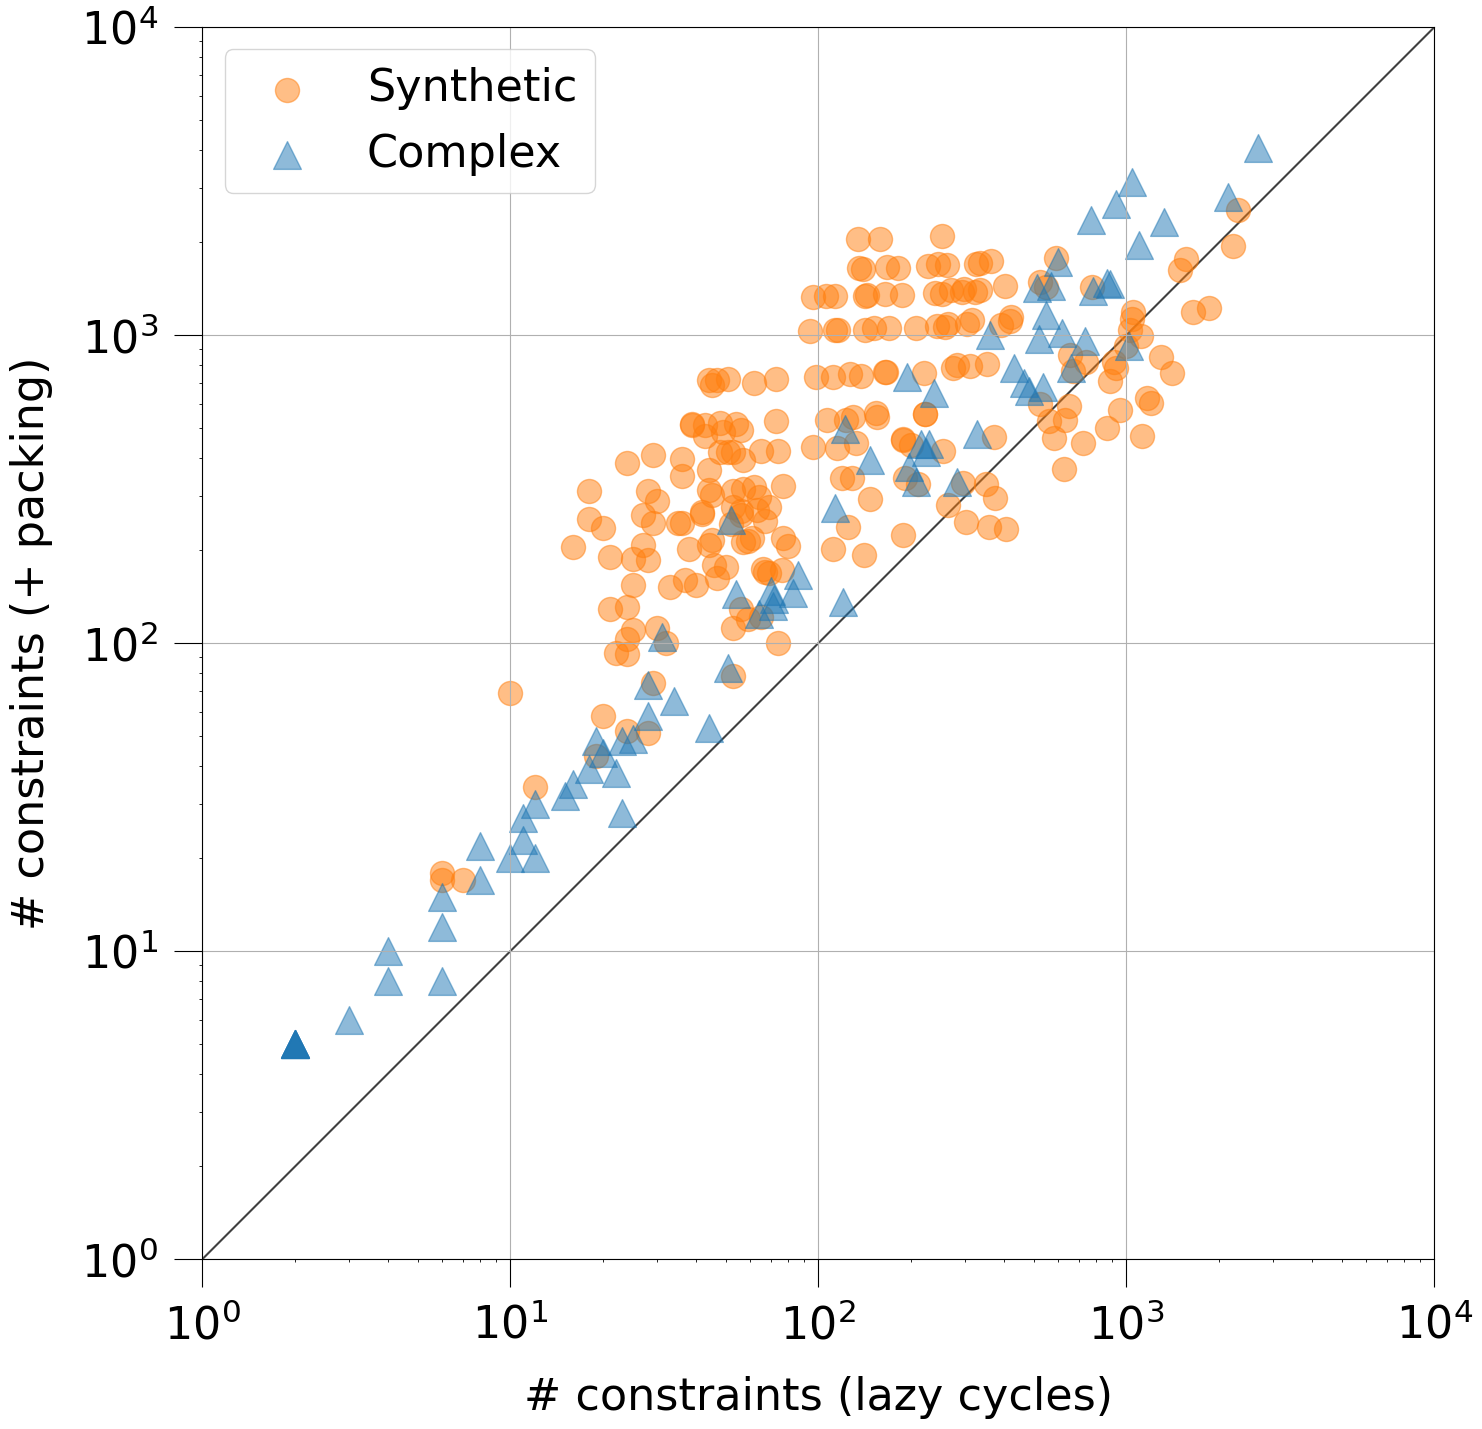

In [51]:
df_merge = df0.merge(df4, on='name', how='inner')
df_merge = df_merge[df_merge['verified_x'] == True]
df_merge = df_merge[df_merge['verified_y'] == True]
df_merge_synthetic, df_merge_complex = split_synthetic_complex(df_merge)

fig, ax = plt.subplots(figsize=(16, 16))
ax.scatter(df_merge_synthetic['num_constraints_x'], df_merge_synthetic['num_constraints_y'], c='tab:orange', marker='o', alpha=0.5, s=300, label='Synthetic')
ax.scatter(df_merge_complex['num_constraints_x'], df_merge_complex['num_constraints_y'], c='tab:blue', marker='^', alpha=0.5, s=400, label='Complex')

ax.set_xlabel('optimal k')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([1, 10000])
ax.set_ylim([1, 10000])
ax.set_xlabel('# constraints (lazy cycles)', labelpad=20)
ax.set_ylabel('# constraints (+ packing)', labelpad=20)
ax.tick_params(axis='both', length=20, which='major', pad=12)
ax.legend()
ax.grid()

# diagonal line
x = np.array([1,70000000])
y = np.array([1,70000000])
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

fig.savefig('plots/v4/LazyCyclesCyclesScatterPlot.png',  bbox_inches='tight')
fig.show()

# Ordering: Preprocessing Line Plot

Dataframe contains 315 elements
Dataframe contains 137 elements
Dataframe contains 315 elements
Dataframe contains 137 elements


C:\Users\lenna\AppData\Local\Temp/ipykernel_17396/432360591.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


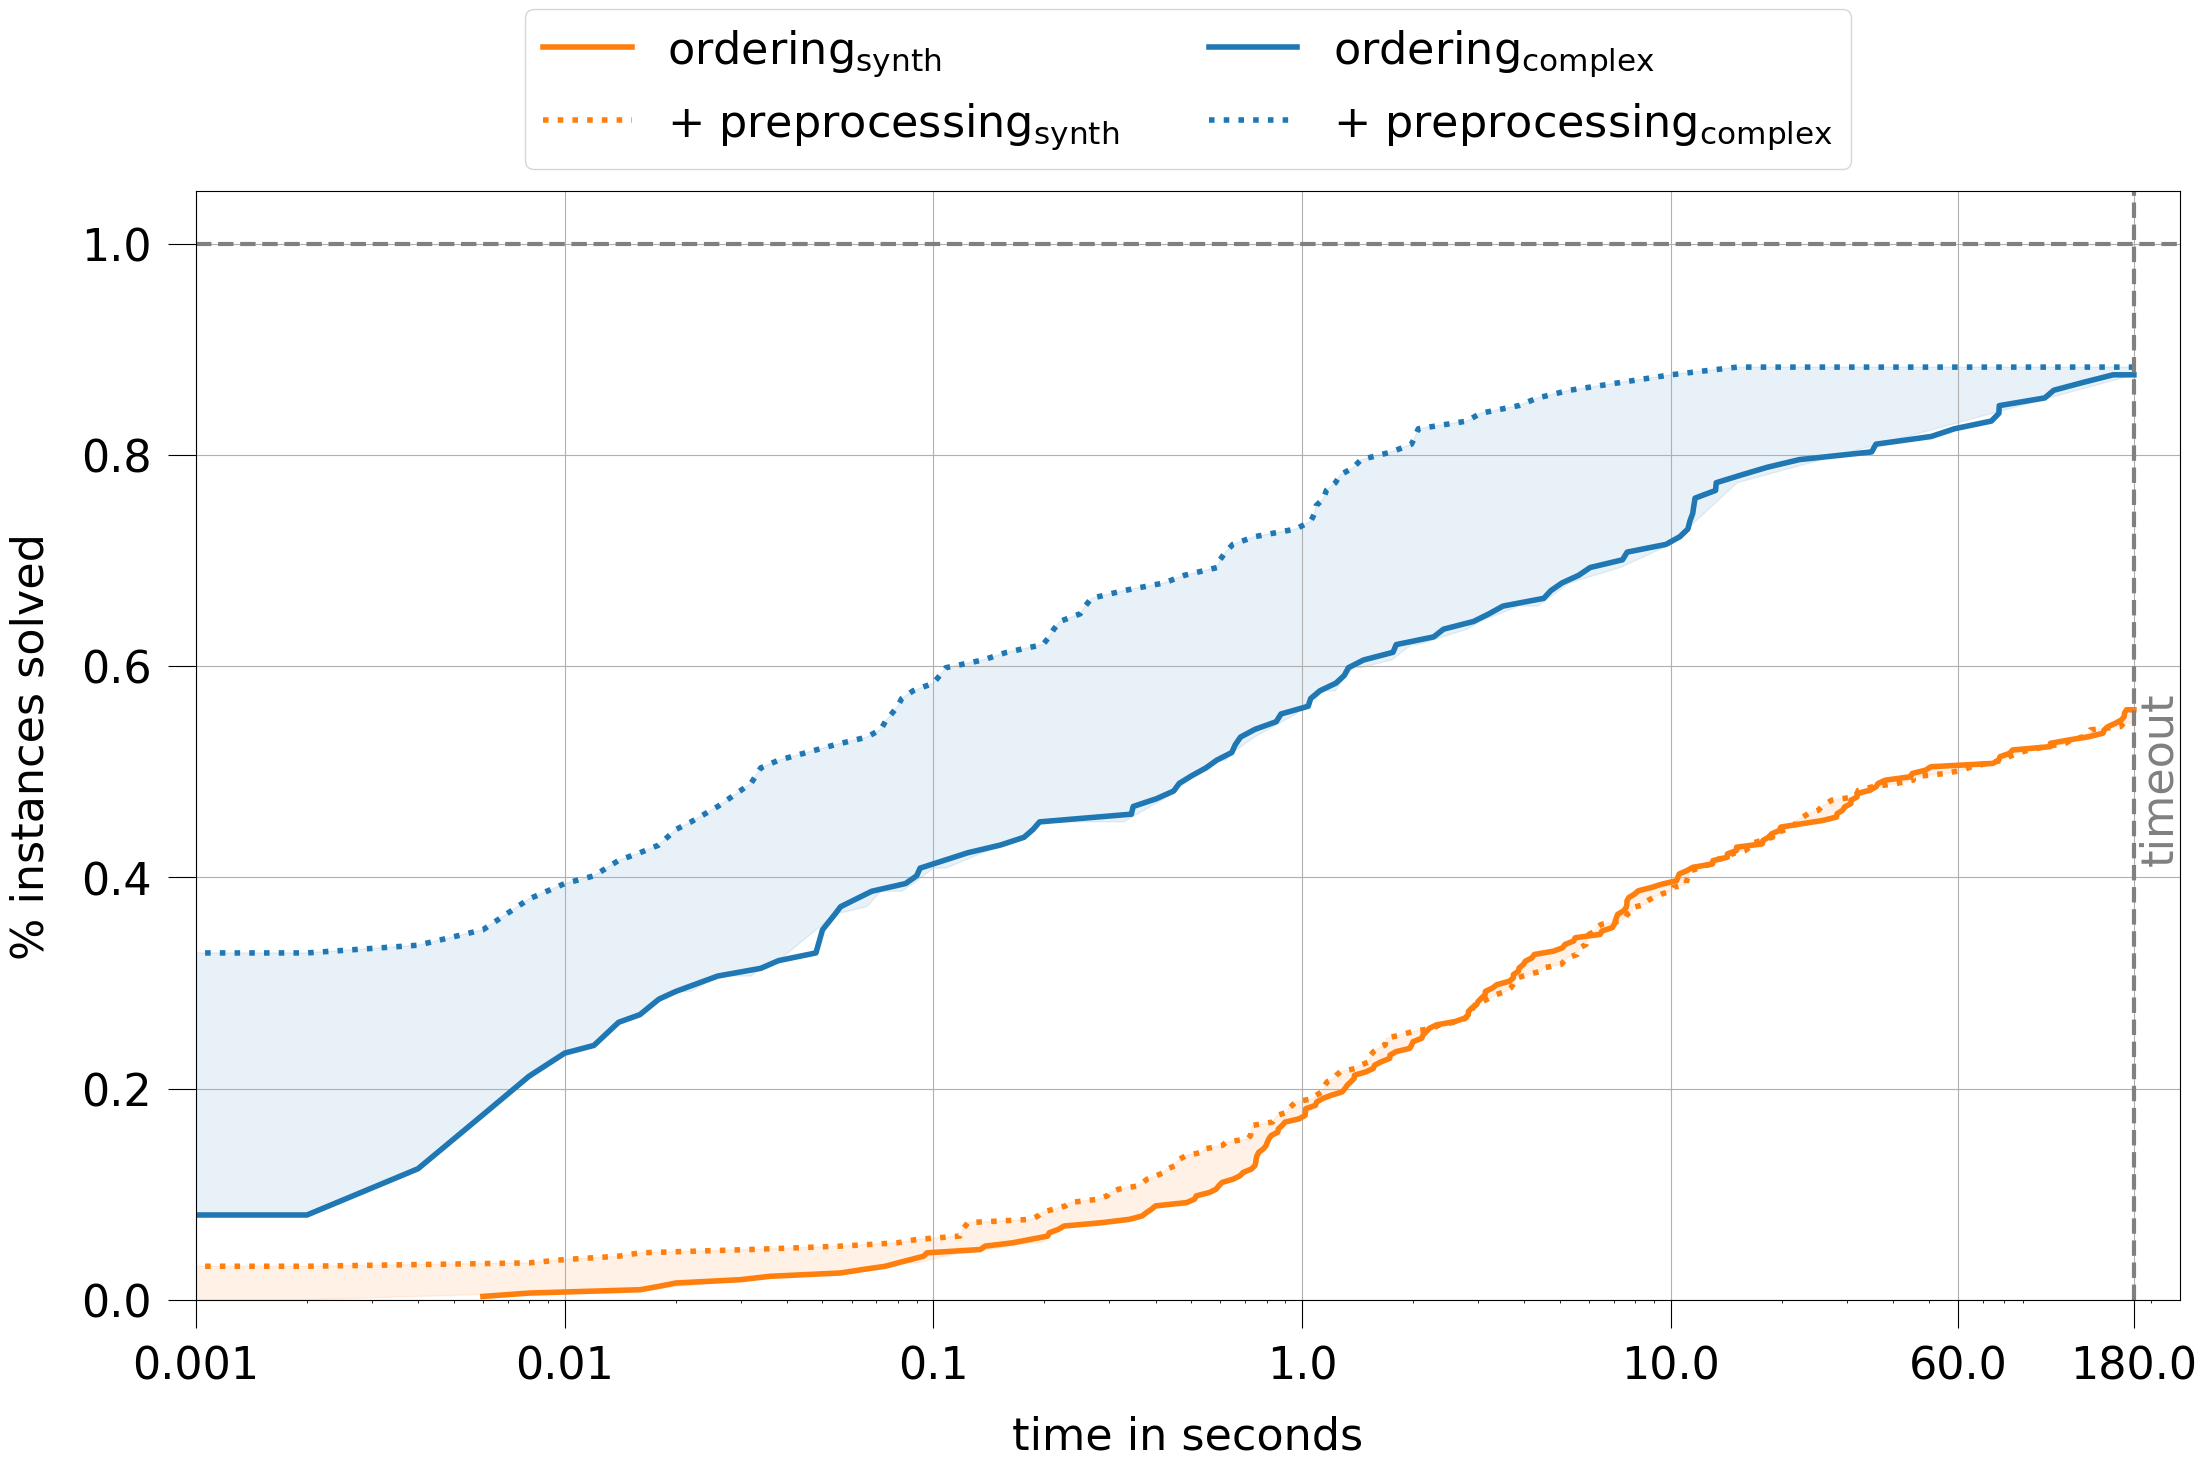

In [29]:
df_A_synthetic, df_A_complex = split_synthetic_complex(df6)
df_B_synthetic, df_B_complex = split_synthetic_complex(df7)

# Calculate percentage dataframes
df_A_synthetic_perc = get_percentage_df(df_A_synthetic)
df_A_complex_perc = get_percentage_df(df_A_complex)
df_B_synthetic_perc = get_percentage_df(df_B_synthetic)
df_B_complex_perc = get_percentage_df(df_B_complex)

# Add percentage values (for the area between curves)
df_A_synthetic_perc = add_percentage_df(df_A_synthetic_perc, df_B_synthetic)
df_A_complex_perc = add_percentage_df(df_A_complex_perc, df_B_complex)

# Plot lines
fig, ax = plt.subplots(figsize=(25.6, 14.4))
ax.plot(df_B_synthetic_perc['percentage_solved'], c='tab:orange', linewidth='4', label='$ordering_{synth}$')
ax.plot(df_A_synthetic_perc['percentage_solved'], c='tab:orange', linestyle=':', linewidth='4', label='+ $preprocessing_{synth}$')
ax.plot(df_B_complex_perc['percentage_solved'], c='tab:blue', linewidth='4', label='$ordering_{complex}$')
ax.plot(df_A_complex_perc['percentage_solved'], c='tab:blue', linestyle=':', linewidth='4', label='+ $preprocessing_{complex}$')
# Fill area between curves
ax.fill_between(df_A_synthetic_perc.index, df_A_synthetic_perc['percentage_solved'], df_A_synthetic_perc['percentage_solved_y'], color='tab:orange', alpha=0.1)
ax.fill_between(df_A_complex_perc.index, df_A_complex_perc['percentage_solved'], df_A_complex_perc['percentage_solved_y'], color='tab:blue', alpha=0.1)

ax.set_xlabel('time in seconds', labelpad=20)
ax.set_ylabel('% instances solved', labelpad=20)
ax.set_xlim([1, 240000])
ax.set_ylim([0, 1.05])
ax.set_xscale('log')
ax.set_xticks([1, 10, 100, 1000, 10000, 60000, 180000])
ax.set_xticklabels([0.001, 0.01, 0.1, 1.0, 10.0, 60.0, 180.0])
ax.tick_params(axis='both', length=20, which='major', pad=12)
ax.grid()
ax.legend(bbox_to_anchor=(0, 1, 1, 0), loc='lower center', ncol=2)

# Draw
ax.axvline(x=180000, color='gray', linestyle='--', linewidth=3)
ax.axhline(y=1, color='gray', linestyle='--', linewidth=3)
ax.text(185000, 0.42, "timeout", color='gray', rotation='vertical')

fig.savefig('plots/v4/OrderingPreprocessingLinePlot.png',  bbox_inches='tight')
fig.show()

# Ordering: Packing Line Plot

Dataframe contains 315 elements
Dataframe contains 137 elements
Dataframe contains 315 elements
Dataframe contains 137 elements


C:\Users\lenna\AppData\Local\Temp/ipykernel_17396/861361772.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


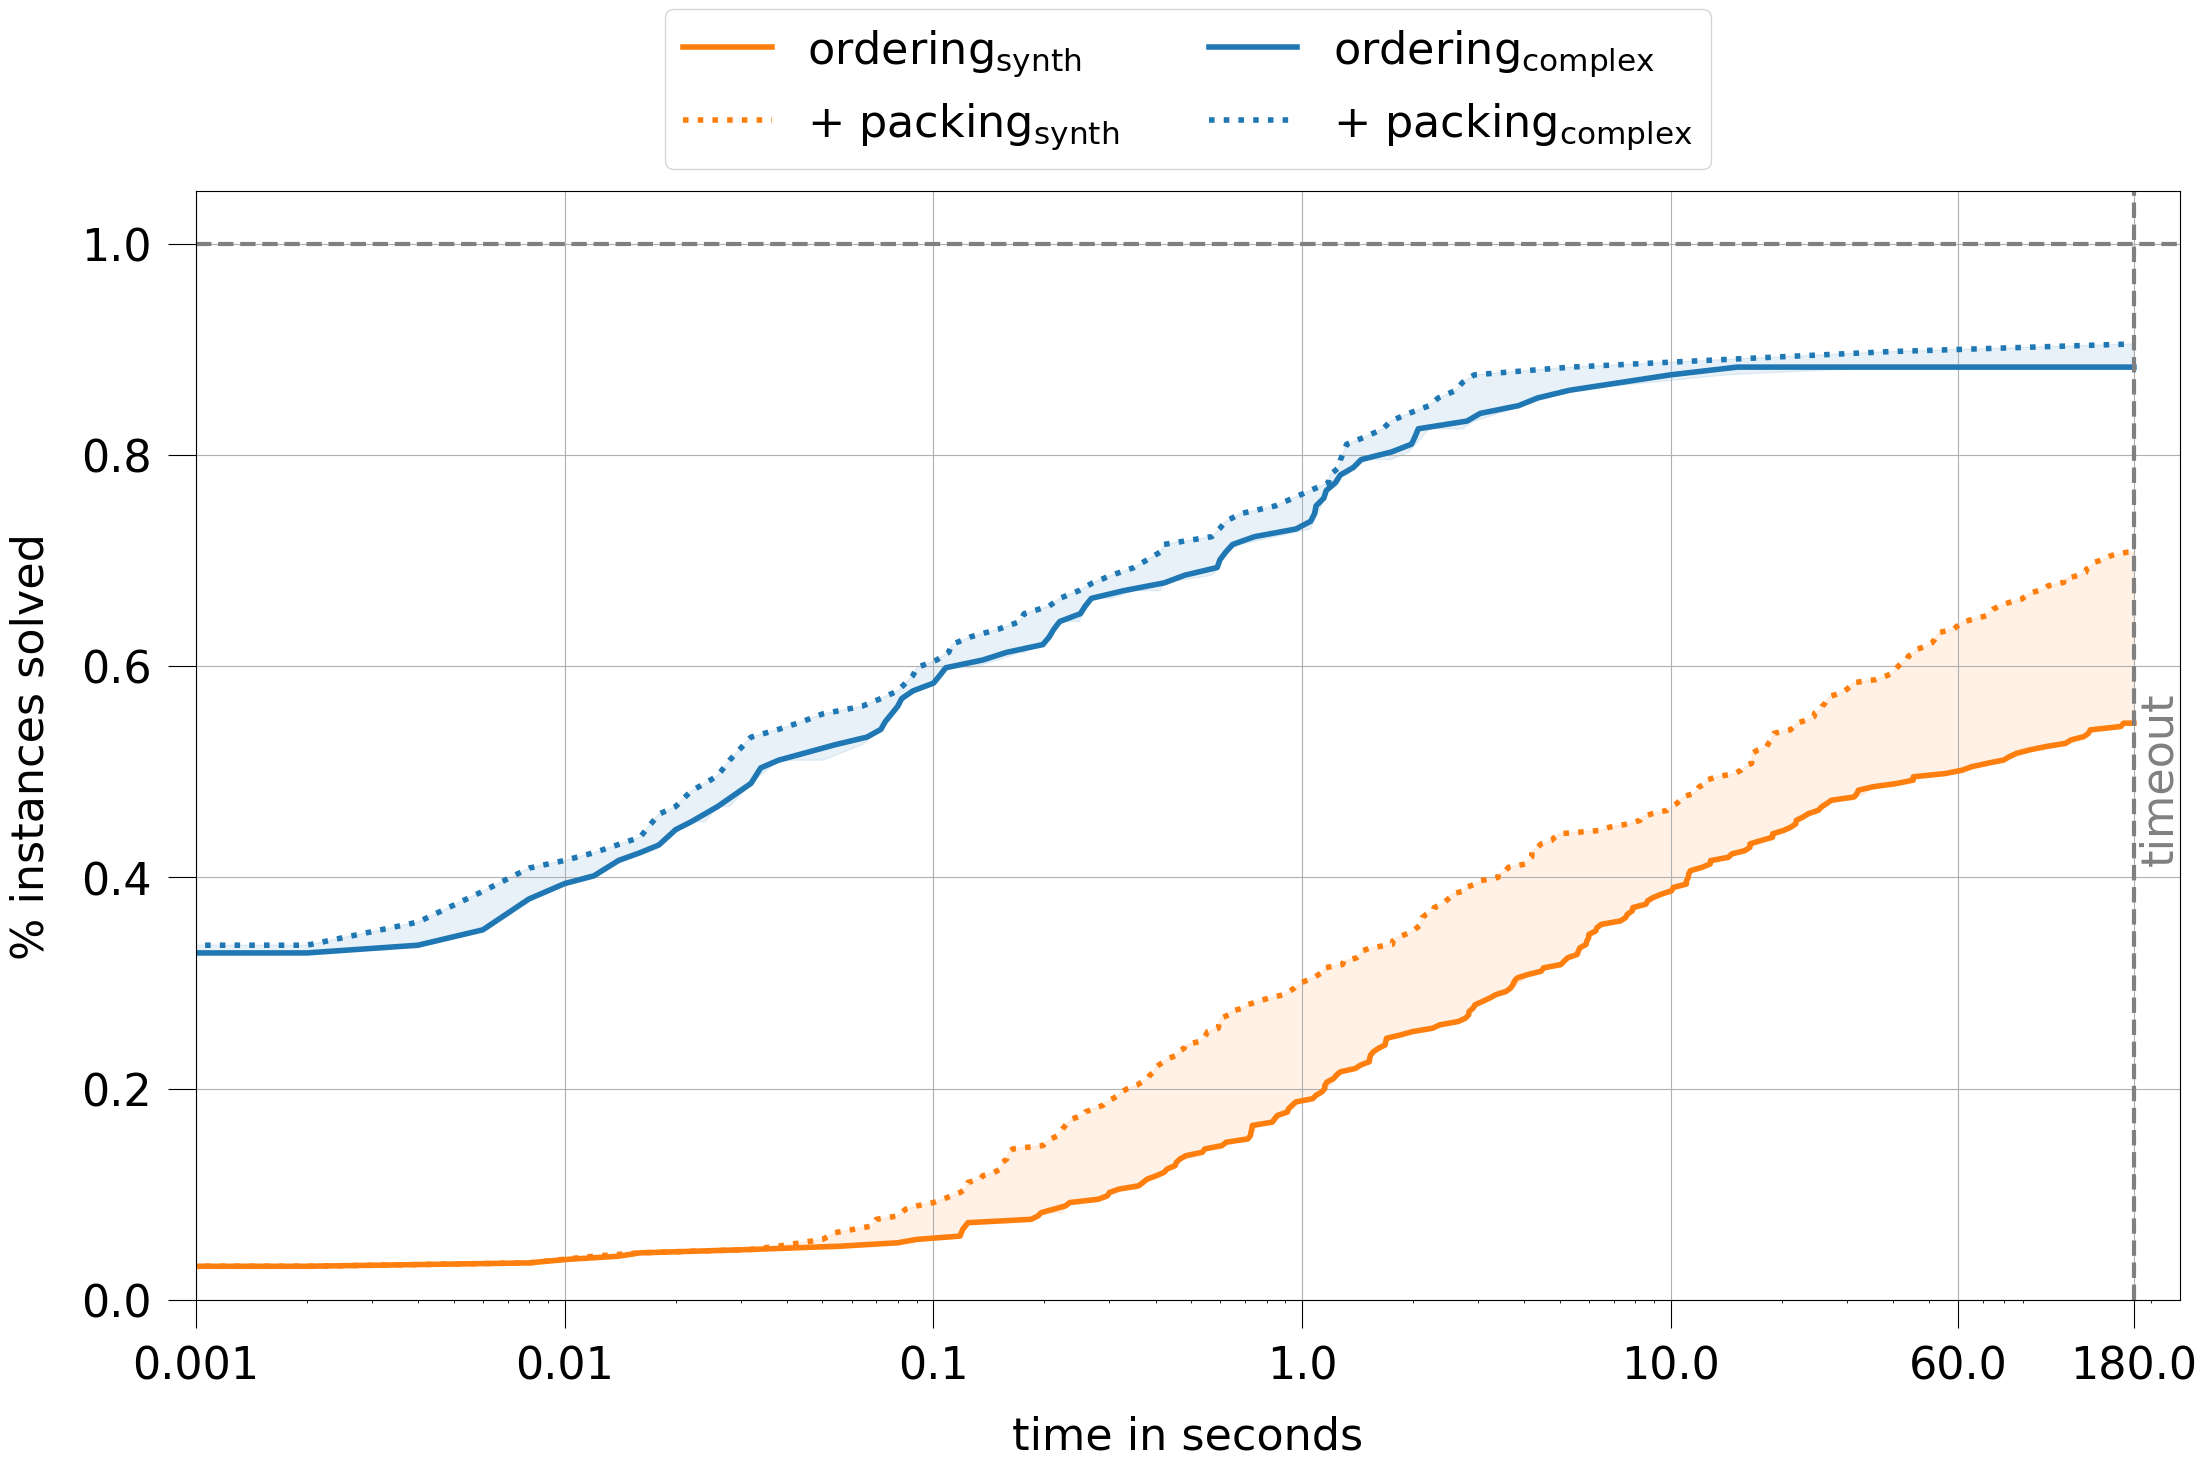

In [30]:
df_A_synthetic, df_A_complex = split_synthetic_complex(df5)
df_B_synthetic, df_B_complex = split_synthetic_complex(df6)

# Calculate percentage dataframes
df_A_synthetic_perc = get_percentage_df(df_A_synthetic)
df_A_complex_perc = get_percentage_df(df_A_complex)
df_B_synthetic_perc = get_percentage_df(df_B_synthetic)
df_B_complex_perc = get_percentage_df(df_B_complex)

# Add percentage values (for the area between curves)
df_A_synthetic_perc = add_percentage_df(df_A_synthetic_perc, df_B_synthetic)
df_A_complex_perc = add_percentage_df(df_A_complex_perc, df_B_complex)

# Plot lines
fig, ax = plt.subplots(figsize=(25.6, 14.4))
ax.plot(df_B_synthetic_perc['percentage_solved'], c='tab:orange', linewidth='4', label='$ordering_{synth}$')
ax.plot(df_A_synthetic_perc['percentage_solved'], c='tab:orange', linestyle=':', linewidth='4', label='+ $packing_{synth}$')
ax.plot(df_B_complex_perc['percentage_solved'], c='tab:blue', linewidth='4', label='$ordering_{complex}$')
ax.plot(df_A_complex_perc['percentage_solved'], c='tab:blue', linestyle=':', linewidth='4', label='+ $packing_{complex}$')
# Fill area between curves
ax.fill_between(df_A_synthetic_perc.index, df_A_synthetic_perc['percentage_solved'], df_A_synthetic_perc['percentage_solved_y'], color='tab:orange', alpha=0.1)
ax.fill_between(df_A_complex_perc.index, df_A_complex_perc['percentage_solved'], df_A_complex_perc['percentage_solved_y'], color='tab:blue', alpha=0.1)

ax.set_xlabel('time in seconds', labelpad=20)
ax.set_ylabel('% instances solved', labelpad=20)
ax.set_xlim([1, 240000])
ax.set_ylim([0, 1.05])
ax.set_xscale('log')
ax.set_xticks([1, 10, 100, 1000, 10000, 60000, 180000])
ax.set_xticklabels([0.001, 0.01, 0.1, 1.0, 10.0, 60.0, 180.0])
ax.tick_params(axis='both', length=20, which='major', pad=12)
ax.grid()
ax.legend(bbox_to_anchor=(0, 1, 1, 0), loc='lower center', ncol=2)

# Draw
ax.axvline(x=180000, color='gray', linestyle='--', linewidth=3)
ax.axhline(y=1, color='gray', linestyle='--', linewidth=3)
ax.text(185000, 0.42, "timeout", color='gray', rotation='vertical')

fig.savefig('plots/v4/OrderingPackingLinePlot.png',  bbox_inches='tight')
fig.show()

# Ordering: Cycles Constraint Line Plot

Dataframe contains 315 elements
Dataframe contains 137 elements
Dataframe contains 315 elements
Dataframe contains 137 elements


C:\Users\lenna\AppData\Local\Temp/ipykernel_17396/1700472385.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


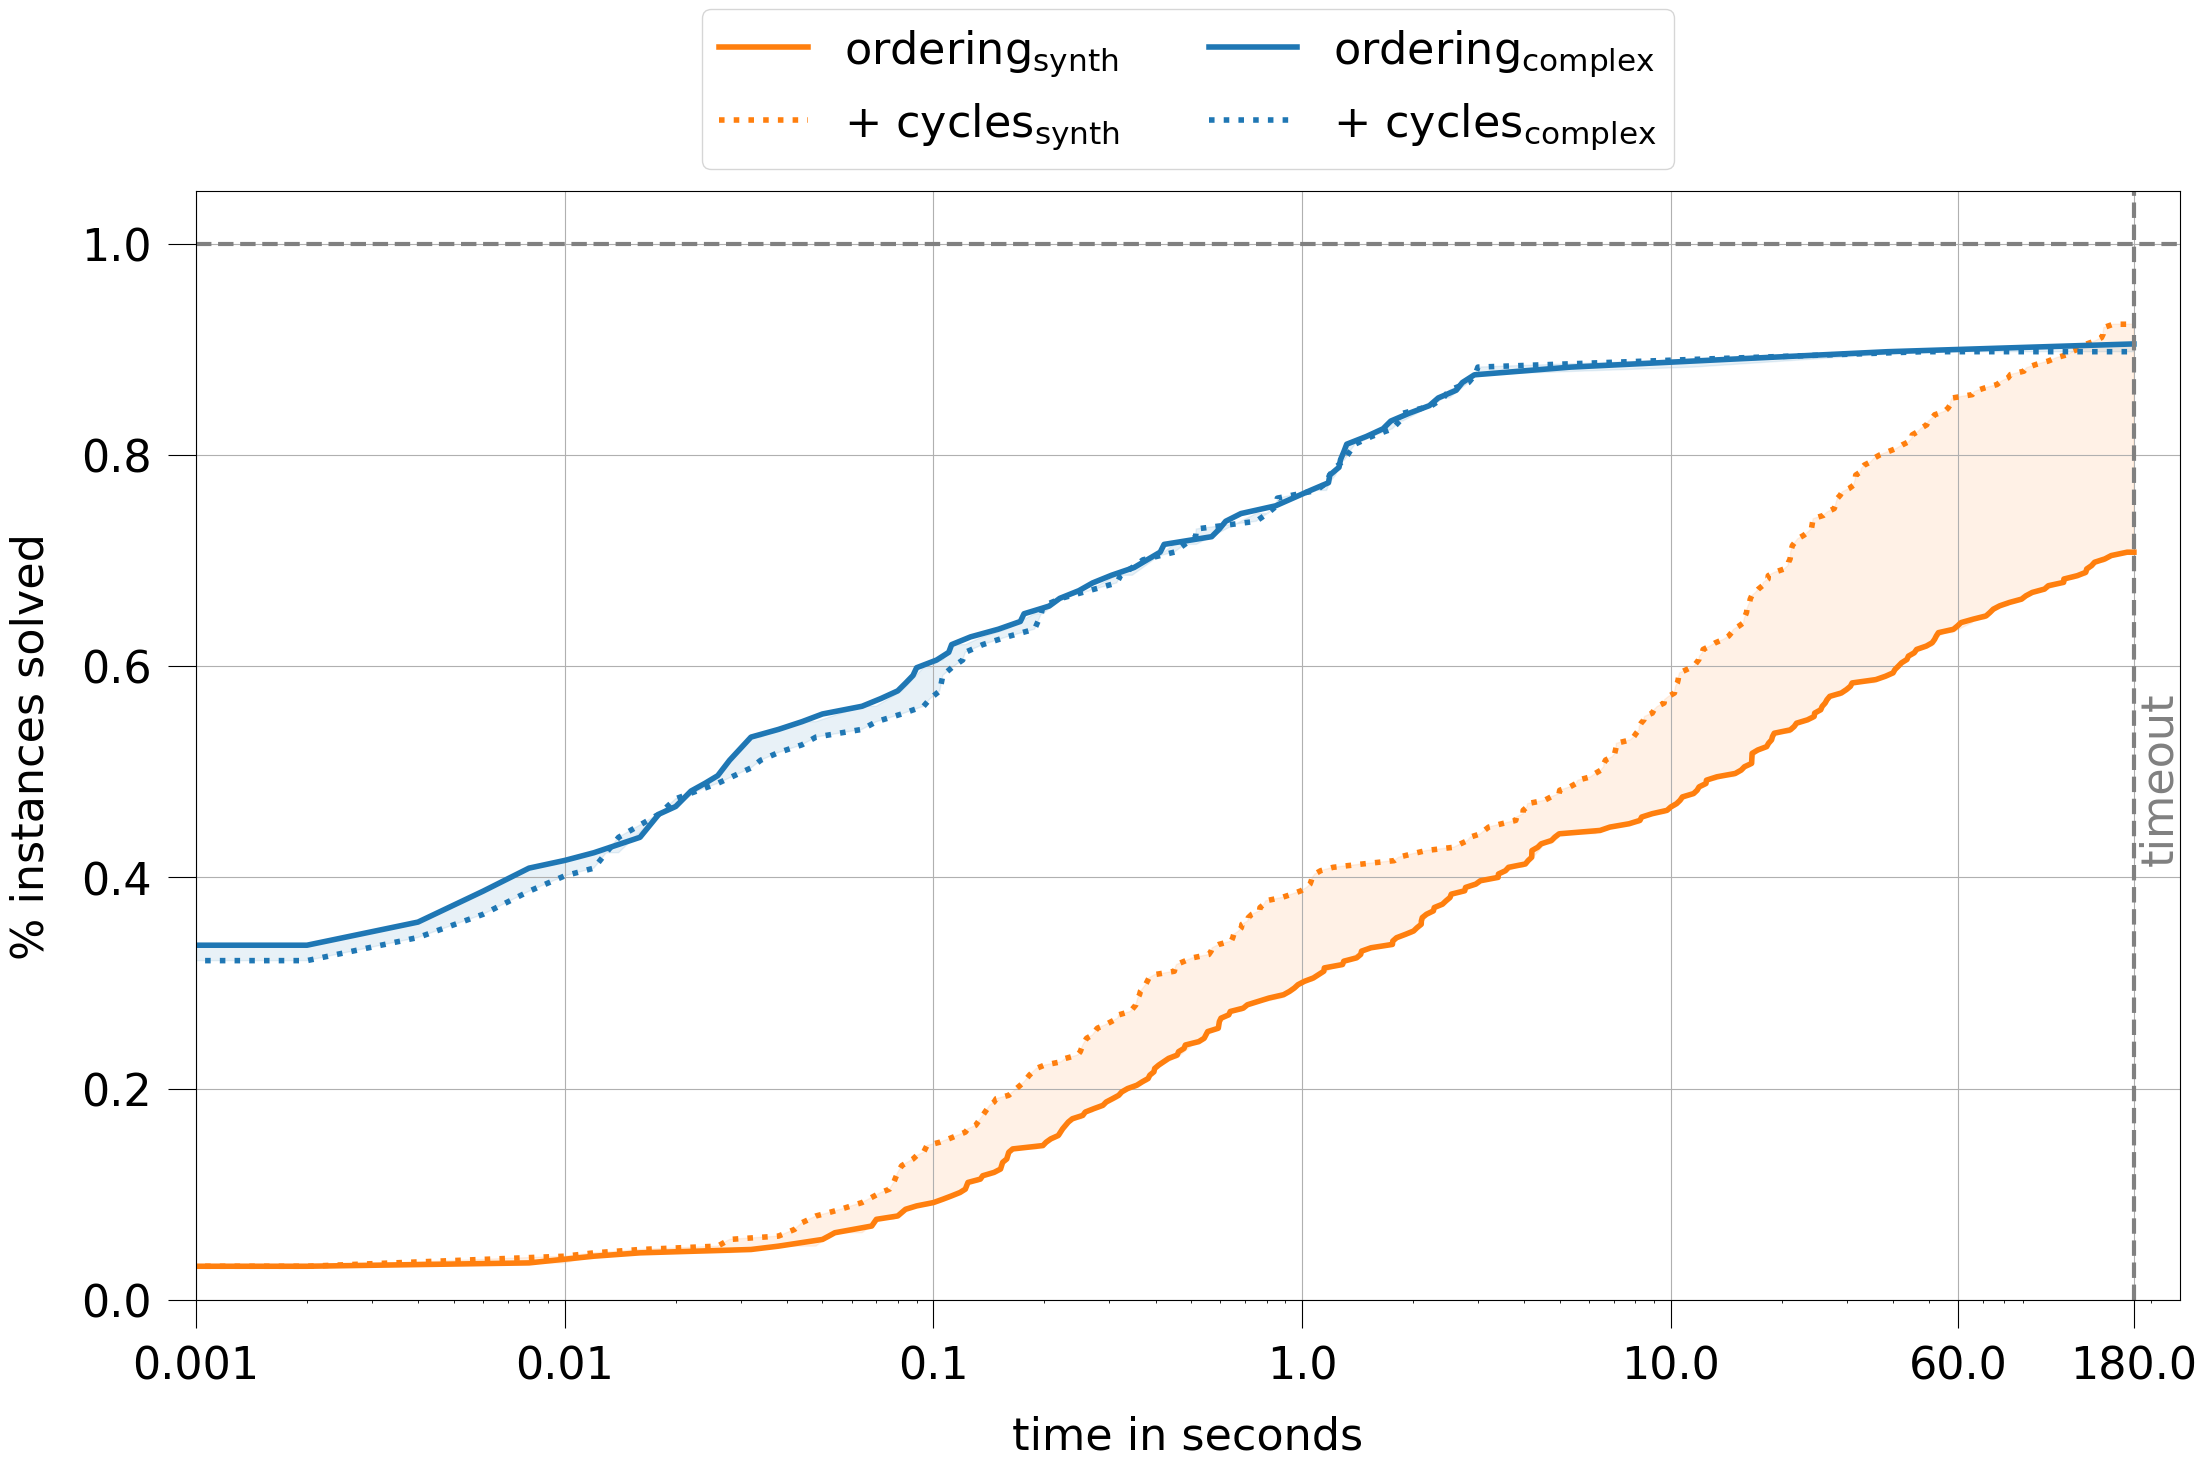

In [31]:
df_A_synthetic, df_A_complex = split_synthetic_complex(df9)
df_B_synthetic, df_B_complex = split_synthetic_complex(df5)

# Calculate percentage dataframes
df_A_synthetic_perc = get_percentage_df(df_A_synthetic)
df_A_complex_perc = get_percentage_df(df_A_complex)
df_B_synthetic_perc = get_percentage_df(df_B_synthetic)
df_B_complex_perc = get_percentage_df(df_B_complex)

# Add percentage values (for the area between curves)
df_A_synthetic_perc = add_percentage_df(df_A_synthetic_perc, df_B_synthetic)
df_A_complex_perc = add_percentage_df(df_A_complex_perc, df_B_complex)

# Plot lines
fig, ax = plt.subplots(figsize=(25.6, 14.4))
ax.plot(df_B_synthetic_perc['percentage_solved'], c='tab:orange', linewidth='4', label='$ordering_{synth}$')
ax.plot(df_A_synthetic_perc['percentage_solved'], c='tab:orange', linestyle=':', linewidth='4', label='+ $cycles_{synth}$')
ax.plot(df_B_complex_perc['percentage_solved'], c='tab:blue', linewidth='4', label='$ordering_{complex}$')
ax.plot(df_A_complex_perc['percentage_solved'], c='tab:blue', linestyle=':', linewidth='4', label='+ $cycles_{complex}$')
# Fill area between curves
ax.fill_between(df_A_synthetic_perc.index, df_A_synthetic_perc['percentage_solved'], df_A_synthetic_perc['percentage_solved_y'], color='tab:orange', alpha=0.1)
ax.fill_between(df_A_complex_perc.index, df_A_complex_perc['percentage_solved'], df_A_complex_perc['percentage_solved_y'], color='tab:blue', alpha=0.1)

ax.set_xlabel('time in seconds', labelpad=20)
ax.set_ylabel('% instances solved', labelpad=20)
ax.set_xlim([1, 240000])
ax.set_ylim([0, 1.05])
ax.set_xscale('log')
ax.set_xticks([1, 10, 100, 1000, 10000, 60000, 180000])
ax.set_xticklabels([0.001, 0.01, 0.1, 1.0, 10.0, 60.0, 180.0])
ax.tick_params(axis='both', length=20, which='major', pad=12)
ax.grid()
ax.legend(bbox_to_anchor=(0, 1, 1, 0), loc='lower center', ncol=2)

# Draw
ax.axvline(x=180000, color='gray', linestyle='--', linewidth=3)
ax.axhline(y=1, color='gray', linestyle='--', linewidth=3)
ax.text(185000, 0.42, "timeout", color='gray', rotation='vertical')

fig.savefig('plots/v4/OrderingCyclesLinePlot.png',  bbox_inches='tight')
fig.show()

# Lazy Cycles vs Ordering Line Plot

Dataframe contains 315 elements
Dataframe contains 137 elements
Dataframe contains 315 elements
Dataframe contains 137 elements


C:\Users\lenna\AppData\Local\Temp/ipykernel_17396/1708791084.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


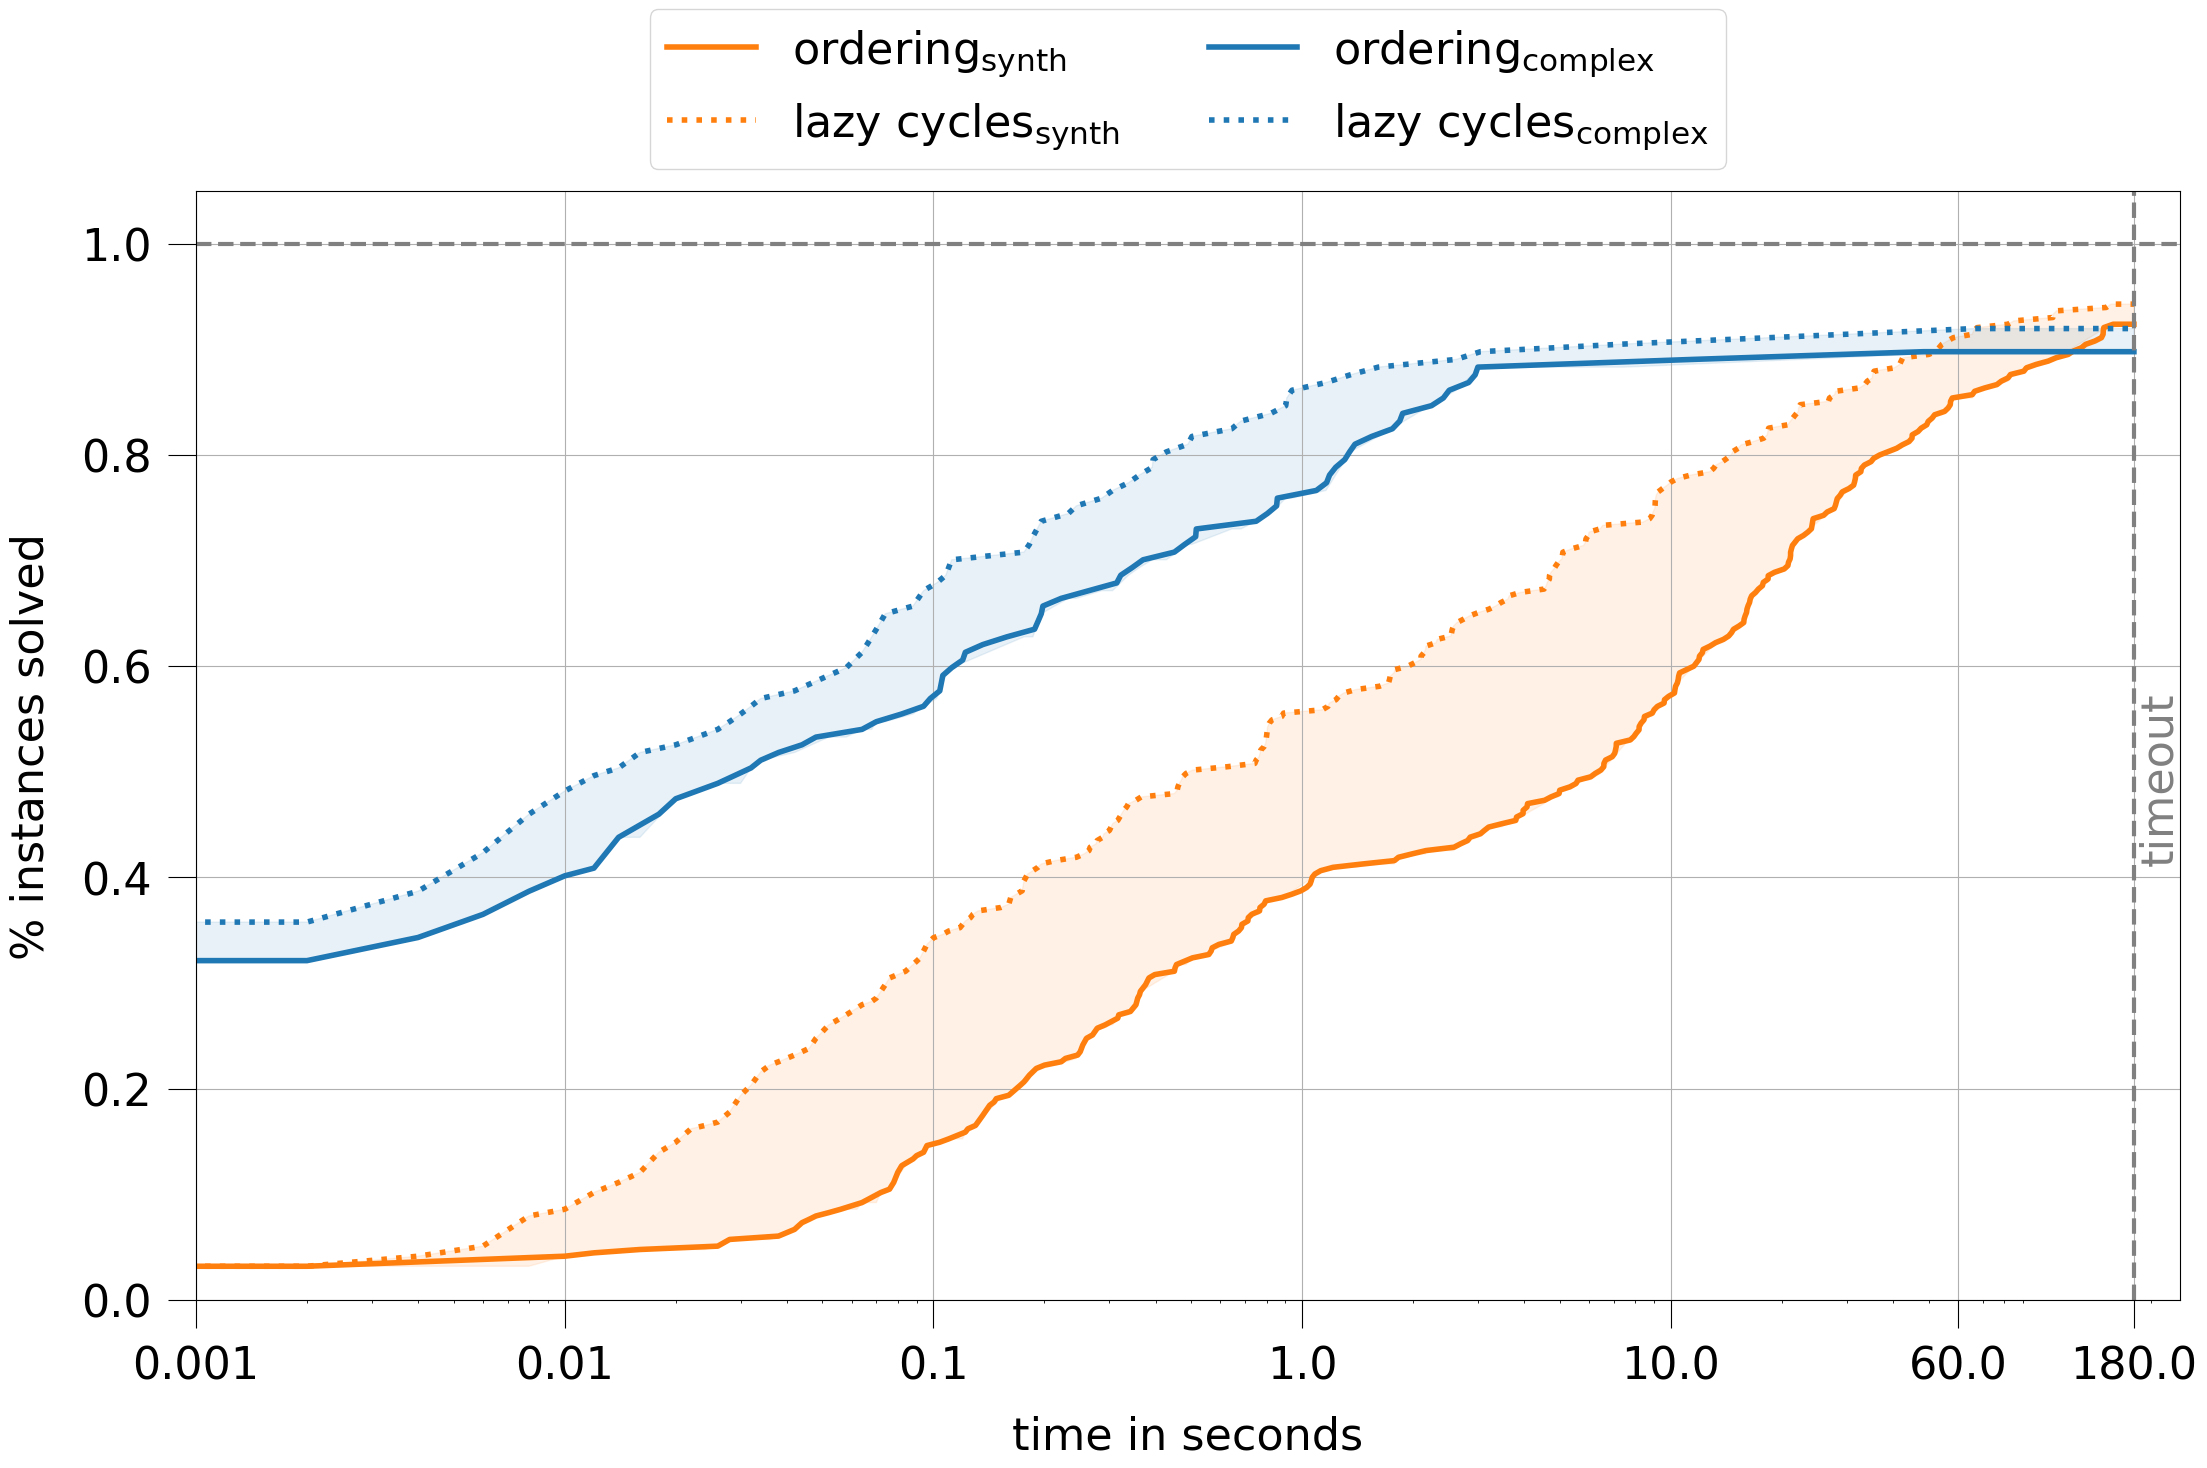

In [61]:
df_A_synthetic, df_A_complex = split_synthetic_complex(df11)
df_B_synthetic, df_B_complex = split_synthetic_complex(df9)

# Calculate percentage dataframes
df_A_synthetic_perc = get_percentage_df(df_A_synthetic)
df_A_complex_perc = get_percentage_df(df_A_complex)
df_B_synthetic_perc = get_percentage_df(df_B_synthetic)
df_B_complex_perc = get_percentage_df(df_B_complex)

# Add percentage values (for the area between curves)
df_A_synthetic_perc = add_percentage_df(df_A_synthetic_perc, df_B_synthetic)
df_A_complex_perc = add_percentage_df(df_A_complex_perc, df_B_complex)

# Plot lines
fig, ax = plt.subplots(figsize=(25.6, 14.4))
ax.plot(df_B_synthetic_perc['percentage_solved'], c='tab:orange', linewidth='4', label='$ordering_{synth}$')
ax.plot(df_A_synthetic_perc['percentage_solved'], c='tab:orange', linestyle=':', linewidth='4', label='lazy $cycles_{synth}$')
ax.plot(df_B_complex_perc['percentage_solved'], c='tab:blue', linewidth='4', label='$ordering_{complex}$')
ax.plot(df_A_complex_perc['percentage_solved'], c='tab:blue', linestyle=':', linewidth='4', label='lazy $cycles_{complex}$')
# Fill area between curves
ax.fill_between(df_A_synthetic_perc.index, df_A_synthetic_perc['percentage_solved'], df_A_synthetic_perc['percentage_solved_y'], color='tab:orange', alpha=0.1)
ax.fill_between(df_A_complex_perc.index, df_A_complex_perc['percentage_solved'], df_A_complex_perc['percentage_solved_y'], color='tab:blue', alpha=0.1)

ax.set_xlabel('time in seconds', labelpad=20)
ax.set_ylabel('% instances solved', labelpad=20)
ax.set_xlim([1, 240000])
ax.set_ylim([0, 1.05])
ax.set_xscale('log')
ax.set_xticks([1, 10, 100, 1000, 10000, 60000, 180000])
ax.set_xticklabels([0.001, 0.01, 0.1, 1.0, 10.0, 60.0, 180.0])
ax.tick_params(axis='both', length=20, which='major', pad=12)
ax.grid()
ax.legend(bbox_to_anchor=(0, 1, 1, 0), loc='lower center', ncol=2)

# Draw
ax.axvline(x=180000, color='gray', linestyle='--', linewidth=3)
ax.axhline(y=1, color='gray', linestyle='--', linewidth=3)
ax.text(185000, 0.42, "timeout", color='gray', rotation='vertical')

fig.savefig('plots/v4/OrderingVsLazyCyclesLinePlot.png',  bbox_inches='tight')
fig.show()

# Lazy Cycles vs Ordering Scatter Plot

C:\Users\lenna\AppData\Local\Temp/ipykernel_17396/2140159086.py:34: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


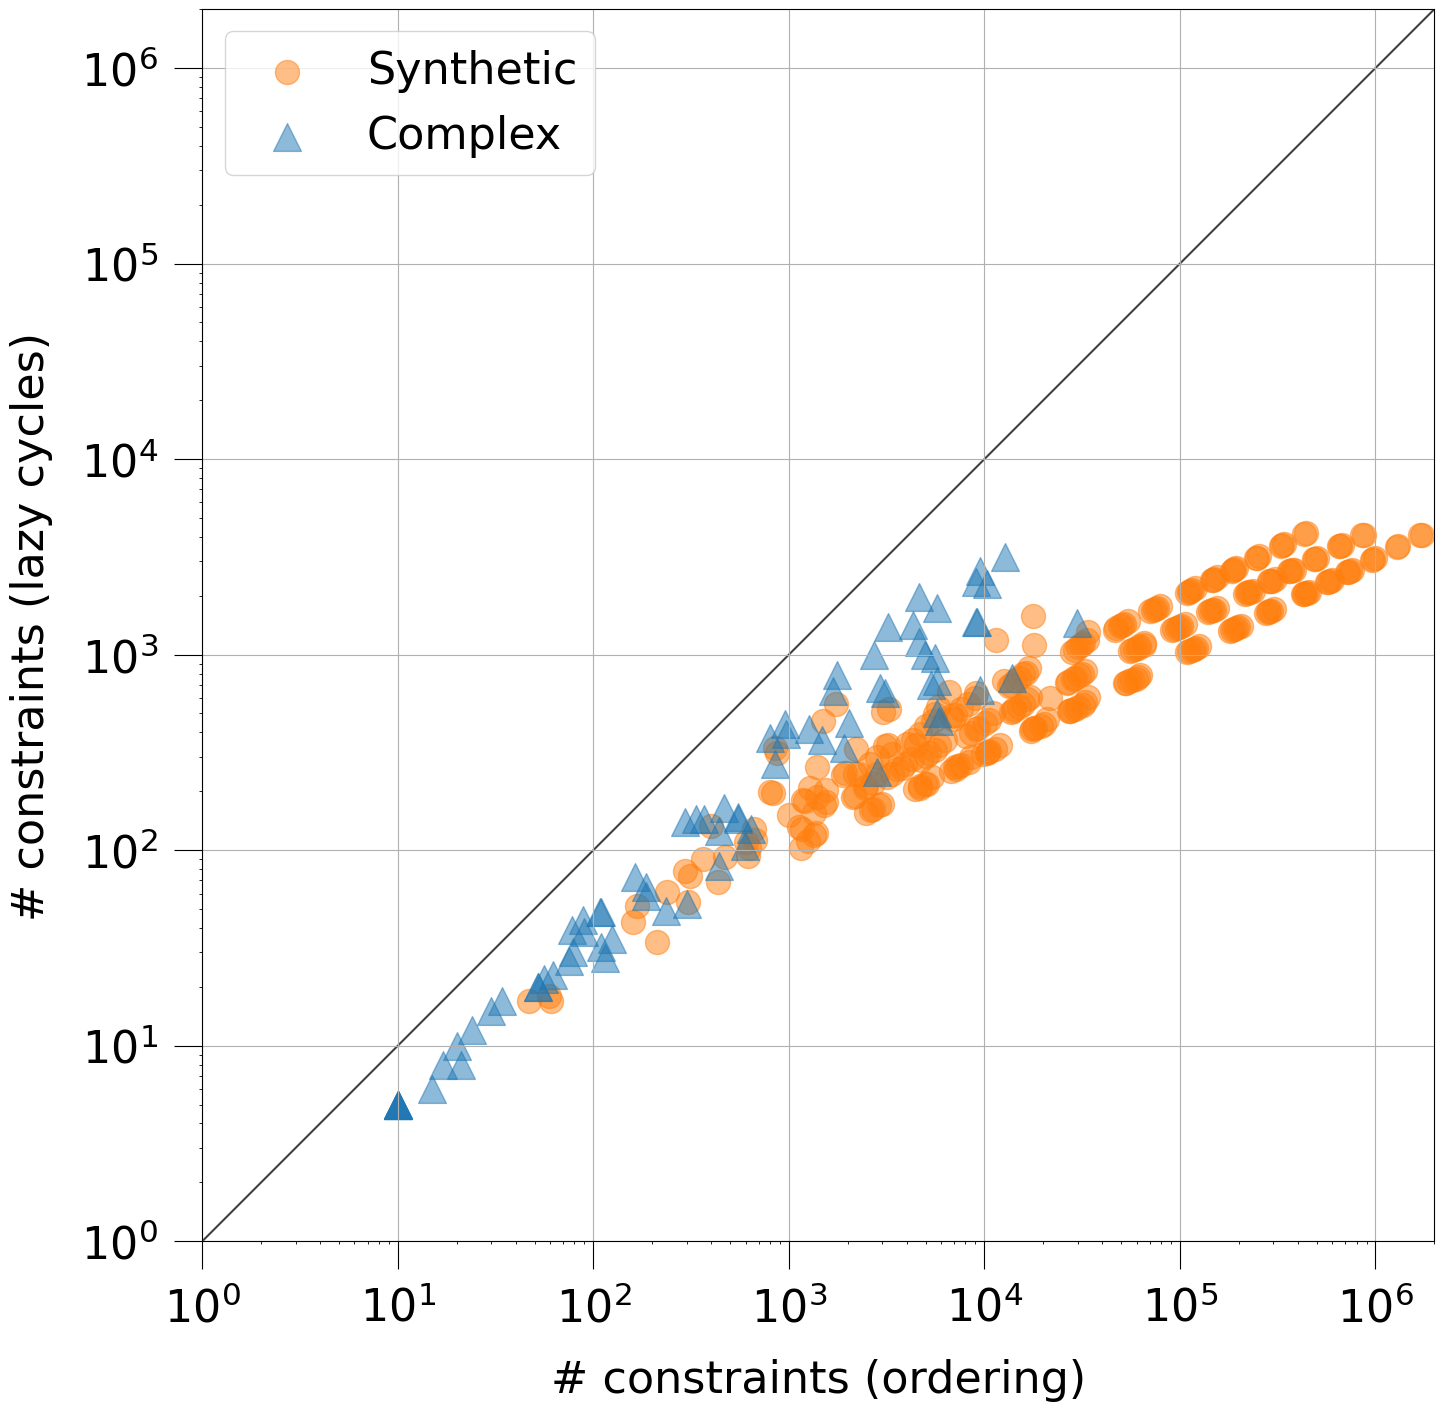

In [62]:
df_merge = df9.merge(df11, on='name', how='inner')
df_merge = df_merge[df_merge['verified_x'] == True]
df_merge = df_merge[df_merge['verified_y'] == True]
df_merge_synthetic, df_merge_complex = split_synthetic_complex(df_merge)

fig, ax = plt.subplots(figsize=(16, 16))
ax.scatter(df_merge_synthetic['num_constraints_x'], df_merge_synthetic['num_constraints_y'], c='tab:orange', marker='o', alpha=0.5, s=300, label='Synthetic')
ax.scatter(df_merge_complex['num_constraints_x'], df_merge_complex['num_constraints_y'], c='tab:blue', marker='^', alpha=0.5, s=400, label='Complex')

ax.set_xlabel('optimal k')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([1, 2000000])
ax.set_ylim([1, 2000000])
ax.set_xlabel('# constraints (ordering)', labelpad=20)
ax.set_ylabel('# constraints (lazy cycles)', labelpad=20)
ax.tick_params(axis='both', length=20, which='major', pad=12)
ax.legend()
ax.grid()

# diagonal line
x = np.array([1,70000000])
y = np.array([1,70000000])
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

fig.savefig('plots/v4/OrderingVsLazyCyclesScatterPlot.png',  bbox_inches='tight')
fig.show()